About Dataset
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Data

Variable	Definition

User_ID	    User ID

Product_ID	Product ID

Gender	Sex of User

Age	Age in bins

Occupation	Occupation(Masked)

City_Category	Category of the City (A,B,C)

Stay_In_Current_City_Years	Number of years stay in current city

Marital_Status	Marital Status

Product_Category_1	Product Category (Masked)

Product_Category_2	Product may belongs to other category also (Masked)

Product_Category_3	Product may belongs to other category also (Masked)

Purchase	Purchase Amount (Target Variable)

### Dataset Description

In [18]:
import pandas as pd 
columns = { 'User_ID':'USER/Customer ID',
           'Product_ID':'ID of Product',
           'Gender':'Sex of User',
           'Age':'Age of User (Divided in bins)',
           'Occupation':'Occupation (Masked)',
           'City_Category':'Category of the City (A,B,C)',
           'Stay_In_Current_City_Years':'Number of years stay in current city',
           'Maritial_Status':'Married/Not Married (1,0)',
           'Product Category_1':'Product Category (Masked)',
           'Product Category_2':'Product may belongs to other category or same also (masked)',
           'Product Category_3':'Product may belongs to other category or same also (masked)',
           'Purchase':'Total Purchased Amount (Target Variable)'
}

# Create a DataFrame with columns and their descriptions
data = pd.DataFrame(list(columns.items()), columns=["Column Name", "Description"])
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
data.set_index('Column Name')

,Description
Column Name,
User_ID,USER/Customer ID
Product_ID,ID of Product
Gender,Sex of User
Age,Age of User (Divided in bins)
Occupation,Occupation (Masked)
City_Category,"Category of the City (A,B,C)"
Stay_In_Current_City_Years,Number of years stay in current city
Maritial_Status,"Married/Not Married (1,0)"
Product Category_1,Product Category (Masked)


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import statsmodels.stats as sm
import scipy.stats as stats
from scipy.stats import mannwhitneyu,kruskal,chi2_contingency,f_oneway

### Loading Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combined = pd.concat([train,test])

In [21]:
# combined = train._append(test)

In [3]:
print('Train Shape:',train.shape)
print('Test Shape:',test.shape)
print('Combined Shape:',combined.shape)

Train Shape: (550068, 12)
Test Shape: (233599, 11)
Combined Shape: (783667, 12)


In [4]:
combined.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [24]:
train[train['Product_ID'] == 'P00069042']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
825,1000149,P00069042,M,26-35,1,B,2,1,3,NaN,NaN,10715
3314,1000541,P00069042,F,18-25,4,C,3,0,3,NaN,NaN,11037
4224,1000698,P00069042,M,18-25,4,A,1,0,3,NaN,NaN,8009
5864,1000951,P00069042,M,46-50,2,B,4+,1,3,NaN,NaN,13346
...,...,...,...,...,...,...,...,...,...,...,...,...
539484,1005061,P00069042,F,18-25,19,C,2,1,3,NaN,NaN,13483
540849,1005284,P00069042,M,26-35,16,C,1,0,3,NaN,NaN,10895
543419,1005667,P00069042,M,36-45,7,B,1,1,3,NaN,NaN,11047
544454,1005812,P00069042,F,26-35,7,A,1,1,3,NaN,NaN,13557


### Info

In [25]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


#### Inference :

### Describe

### 1. Numrical Columns

In [26]:
combined.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Inference :

### 2. Categorical columns

In [27]:
combined.describe(include = 'object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,783667,783667,783667,783667,783667
unique,3677,2,7,3,5
top,P00265242,M,26-35,B,1
freq,2709,590031,313015,329739,276425


#### Inference :

### Null Values

In [8]:
null_val = combined.isnull().sum()
percent = combined.isnull().sum()/len(combined)
df_null = {'Null_Values':null_val,'Percentage':percent}
df_null = pd.DataFrame(df_null).sort_values(by = 'Null_Values',ascending = False)
df_null

,Null_Values,Percentage
Product_Category_3,545809,0.696481
Product_Category_2,245982,0.313886
Purchase,233599,0.298085
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000


#### Inference :

### Unique Values

In [29]:
for i in combined.columns:
    print('-'*20,i,'- Total Unique :',combined[i].nunique(),'-'*25)
    print(combined[i].unique())
    print()

-------------------- User_ID - Total Unique : 5891 -------------------------
[1000001 1000002 1000003 ... 1004113 1005391 1001529]

-------------------- Product_ID - Total Unique : 3677 -------------------------
['P00069042' 'P00248942' 'P00087842' ... 'P00030342' 'P00074942'
 'P00253842']

-------------------- Gender - Total Unique : 2 -------------------------
['F' 'M']

-------------------- Age - Total Unique : 7 -------------------------
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

-------------------- Occupation - Total Unique : 21 -------------------------
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

-------------------- City_Category - Total Unique : 3 -------------------------
['A' 'C' 'B']

-------------------- Stay_In_Current_City_Years - Total Unique : 5 -------------------------
['2' '4+' '3' '1' '0']

-------------------- Marital_Status - Total Unique : 2 -------------------------
[0 1]

-------------------- Product_Category_1 - Total Unique

### Visualization : Distribution Plot (UniVariate)

#### Target Variable

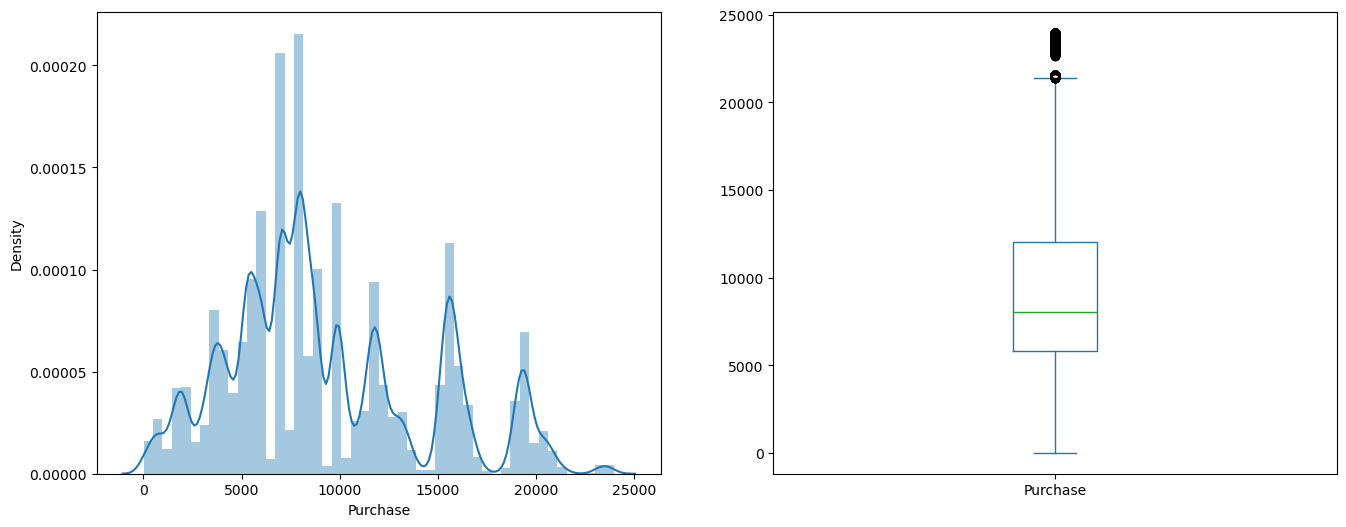

In [30]:
plt.subplot(121)
sns.distplot(train["Purchase"]);

plt.subplot(122)
train["Purchase"].plot.box(figsize = (16, 6))
plt.show()

#### Distribution

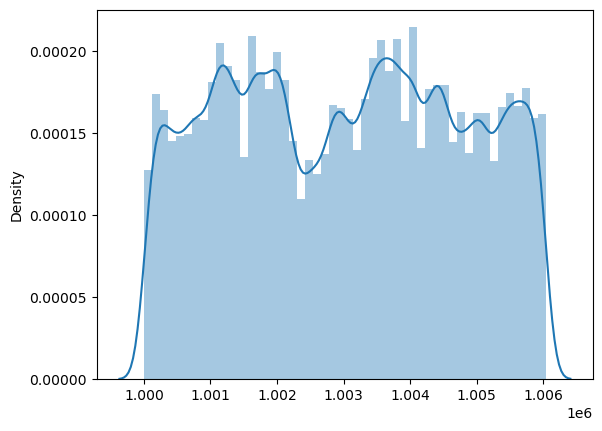

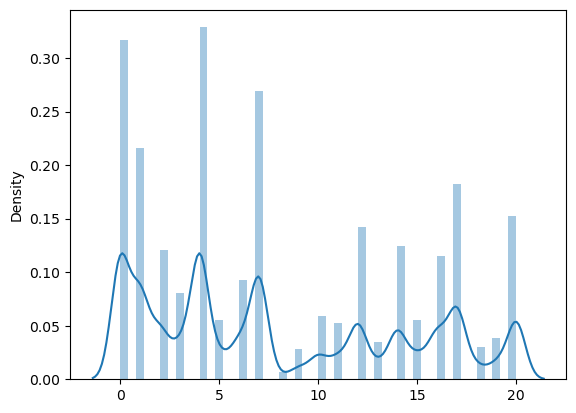

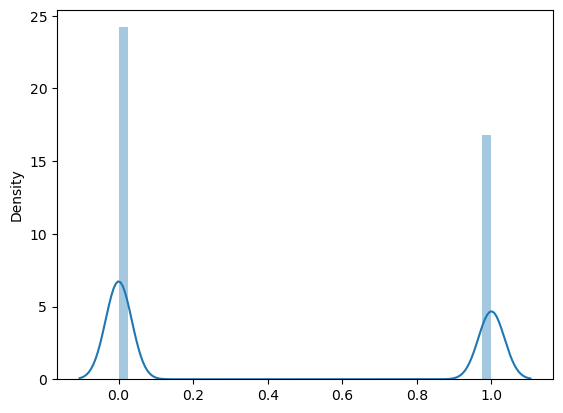

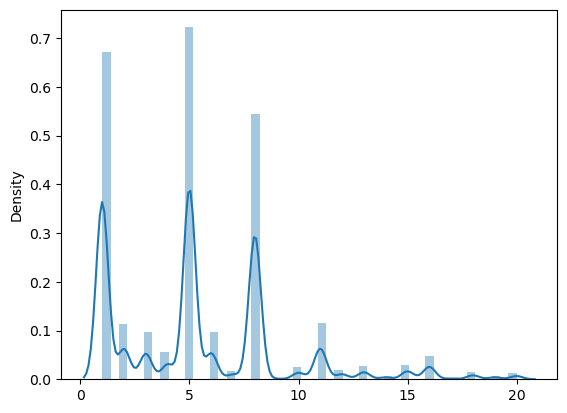

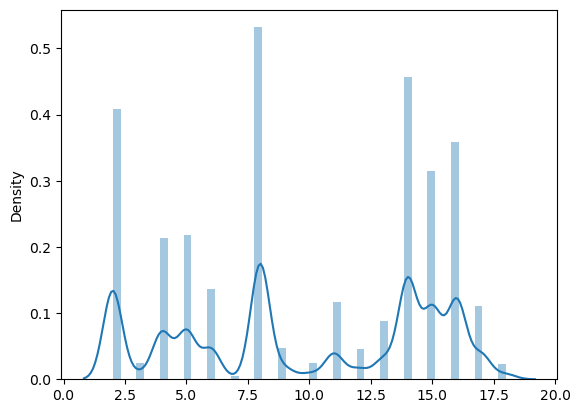

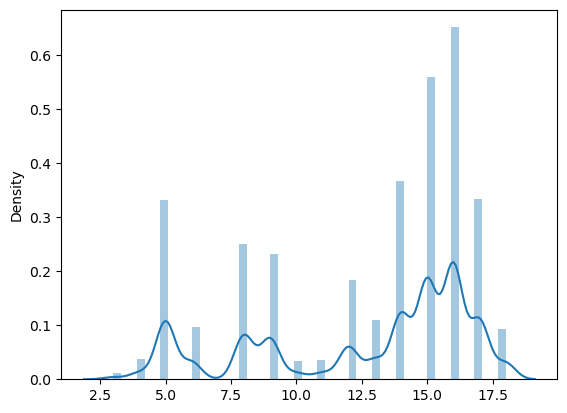

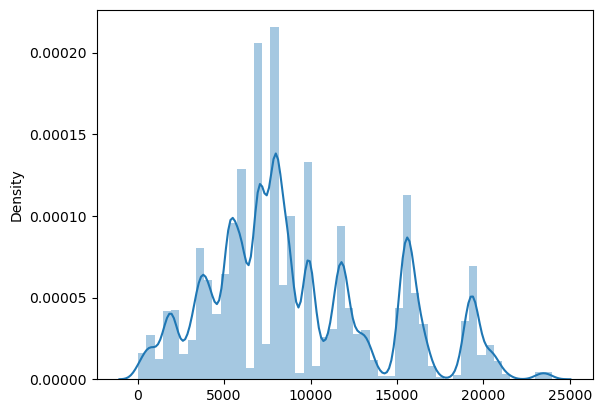

In [31]:
train_num = train.select_dtypes(include = np.number)
for i in train_num.columns:
    sns.distplot(x = train_num[i],kde = True)
    plt.show()

#### Age 

In [32]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

<Axes: >

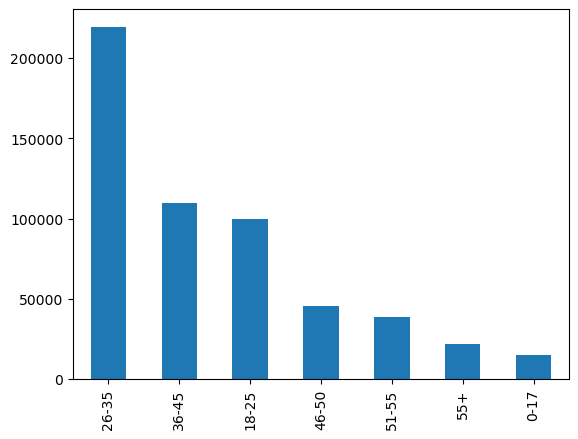

In [33]:
train['Age'].value_counts().plot.bar()

#### Gender

In [34]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

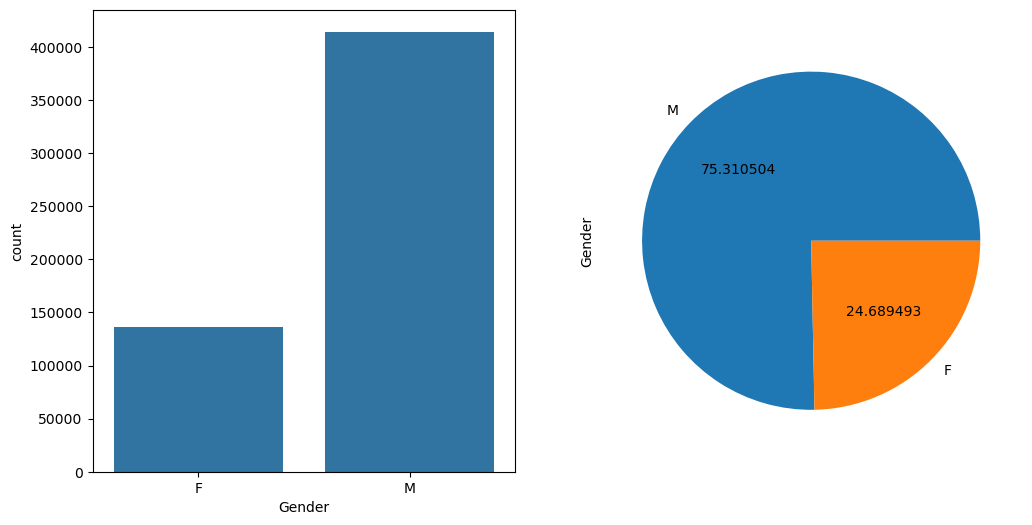

In [35]:
plt.subplot(121)
sns.countplot(x = train['Gender'])

plt.subplot(122)
train['Gender'].value_counts(normalize = True).plot.pie(autopct = '%2f',figsize = (12,6))
plt.show()

#### City Category

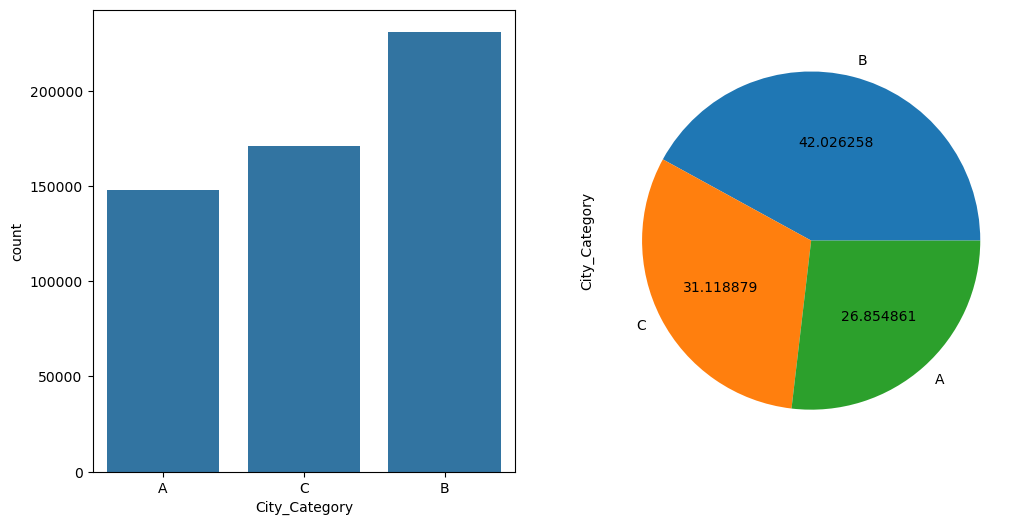

In [36]:
plt.subplot(121)
sns.countplot(x = train['City_Category'])

plt.subplot(122)
train['City_Category'].value_counts(normalize = True).plot.pie(autopct = '%2f',figsize = (12,6))
plt.show()

#### Product Category_1

<Axes: >

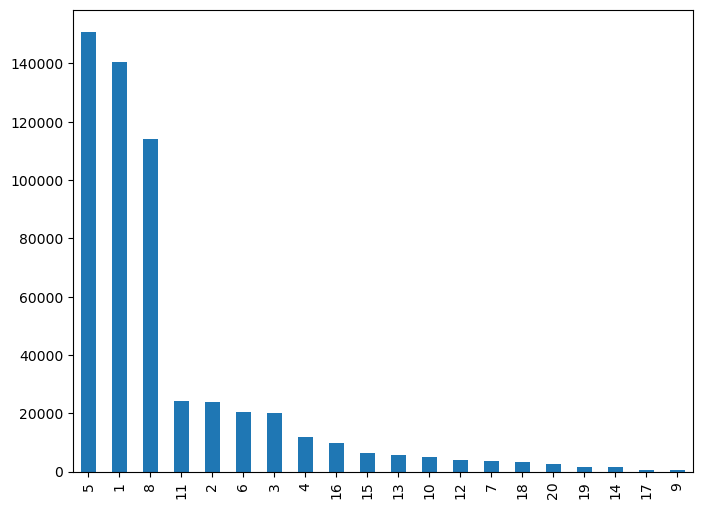

In [37]:
train['Product_Category_1'].value_counts().plot.bar(figsize = (8,6))

#### Product Category 2

<Axes: >

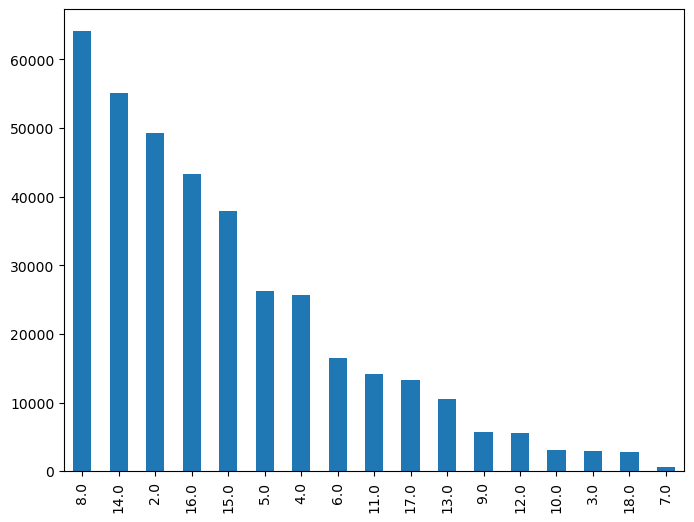

In [38]:
train['Product_Category_2'].value_counts().plot.bar(figsize = (8,6))

#### Product Category 3

<Axes: >

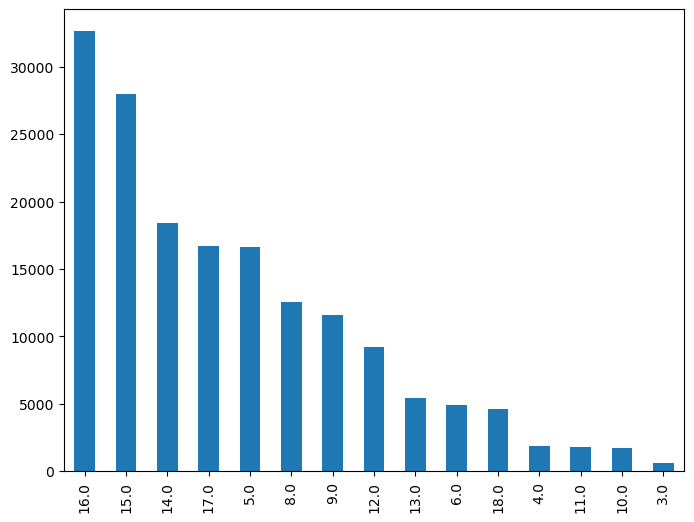

In [39]:
train['Product_Category_3'].value_counts().plot.bar(figsize = (8,6))

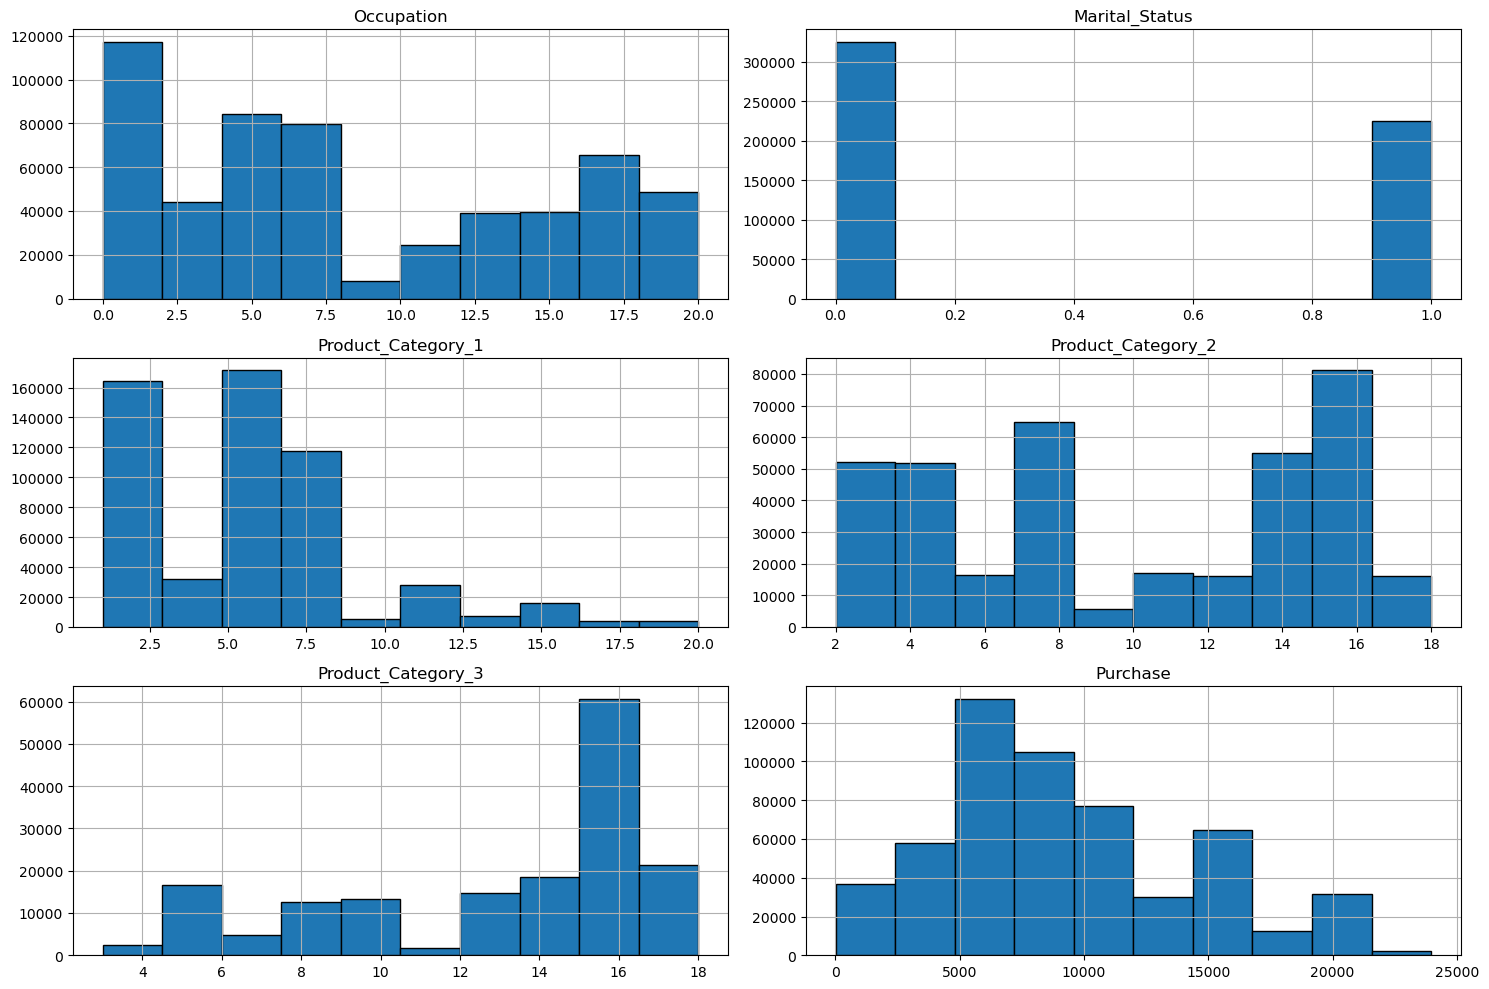

In [40]:
train.drop('User_ID',axis = 1).hist(edgecolor="black", figsize = (15, 10))
plt.tight_layout()
plt.show()

#### Inference :

In [41]:
combined['Marital_Status'] = combined['Marital_Status'].astype('object')

### Visualizing : Bi-Variate

#### Age VS Purchase

<Axes: xlabel='Age'>

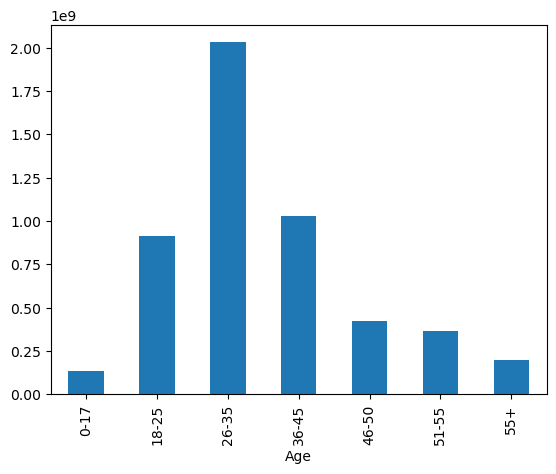

In [42]:
combined.groupby('Age')['Purchase'].sum().plot(kind = 'bar')

#### FacetGrid

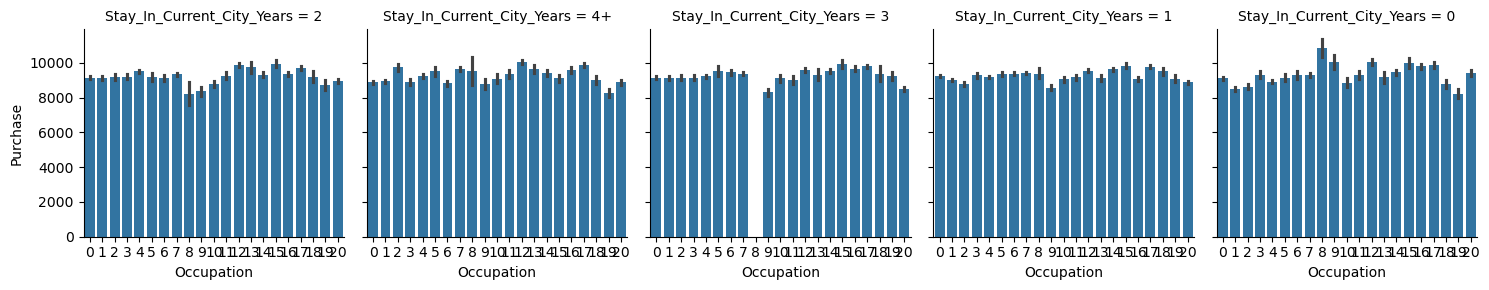

In [43]:
g = sns.FacetGrid(combined, col = "Stay_In_Current_City_Years")
g.map(sns.barplot, "Occupation", "Purchase")
plt.show()

In [44]:
#Inference: that there is no effect on 
#Purchase irrespective of his stay in current city & Occupation...

#### City Category vs Target Variable

<Axes: xlabel='City_Category', ylabel='Purchase'>

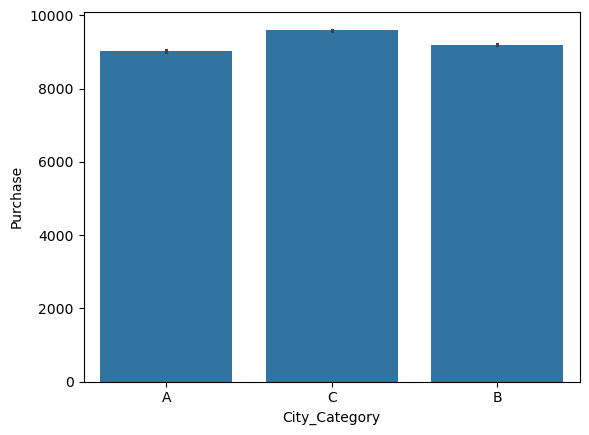

In [45]:
sns.barplot(x = combined['City_Category'],y = combined['Purchase'])

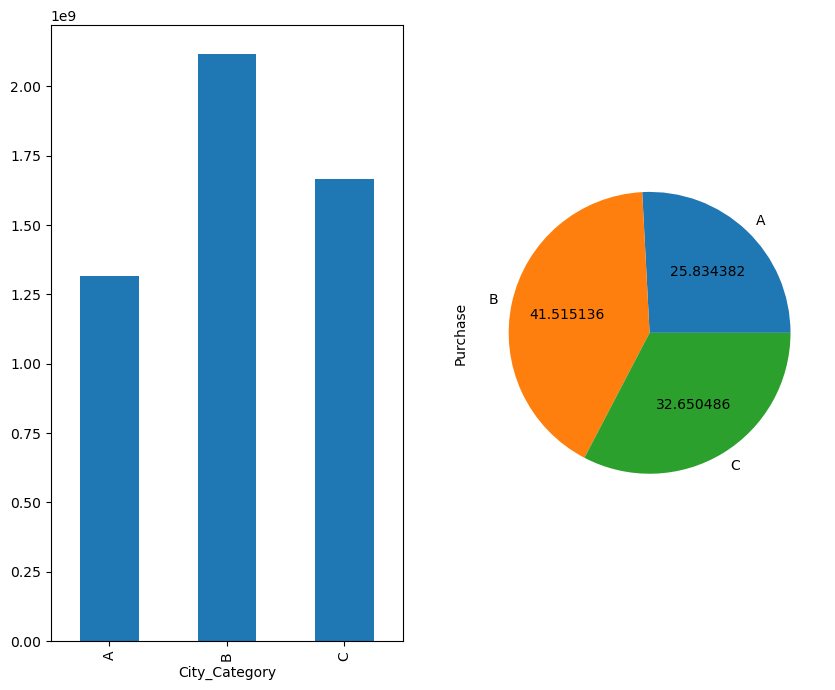

In [46]:
plt.subplot(121)
combined.groupby('City_Category')['Purchase'].sum().plot(kind = 'bar')

plt.subplot(122)
combined.groupby('City_Category')['Purchase'].sum().plot.pie(autopct = '%2f',figsize = (10,8))
plt.show()

#### Gender vs Target Variable

<Axes: xlabel='Gender', ylabel='Purchase'>

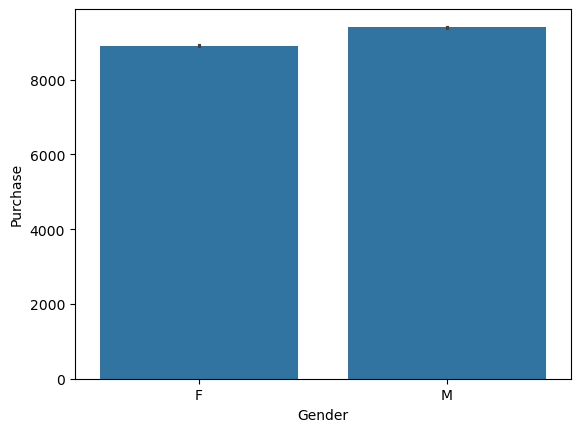

In [47]:
sns.barplot(x = combined['Gender'],y = combined['Purchase'])

<Axes: xlabel='Gender'>

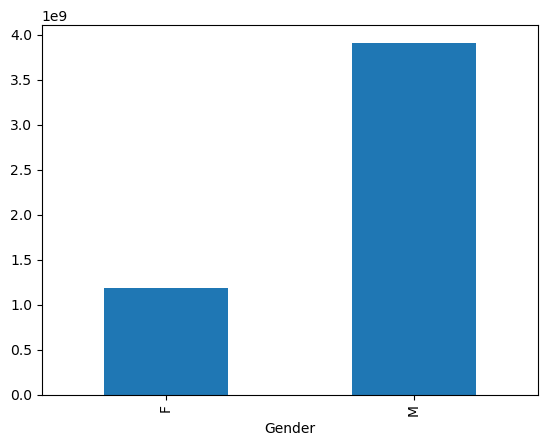

In [48]:
combined.groupby('Gender')['Purchase'].sum().plot(kind = 'bar')

#### Product Category 1 vs Purchase (Target Variable)

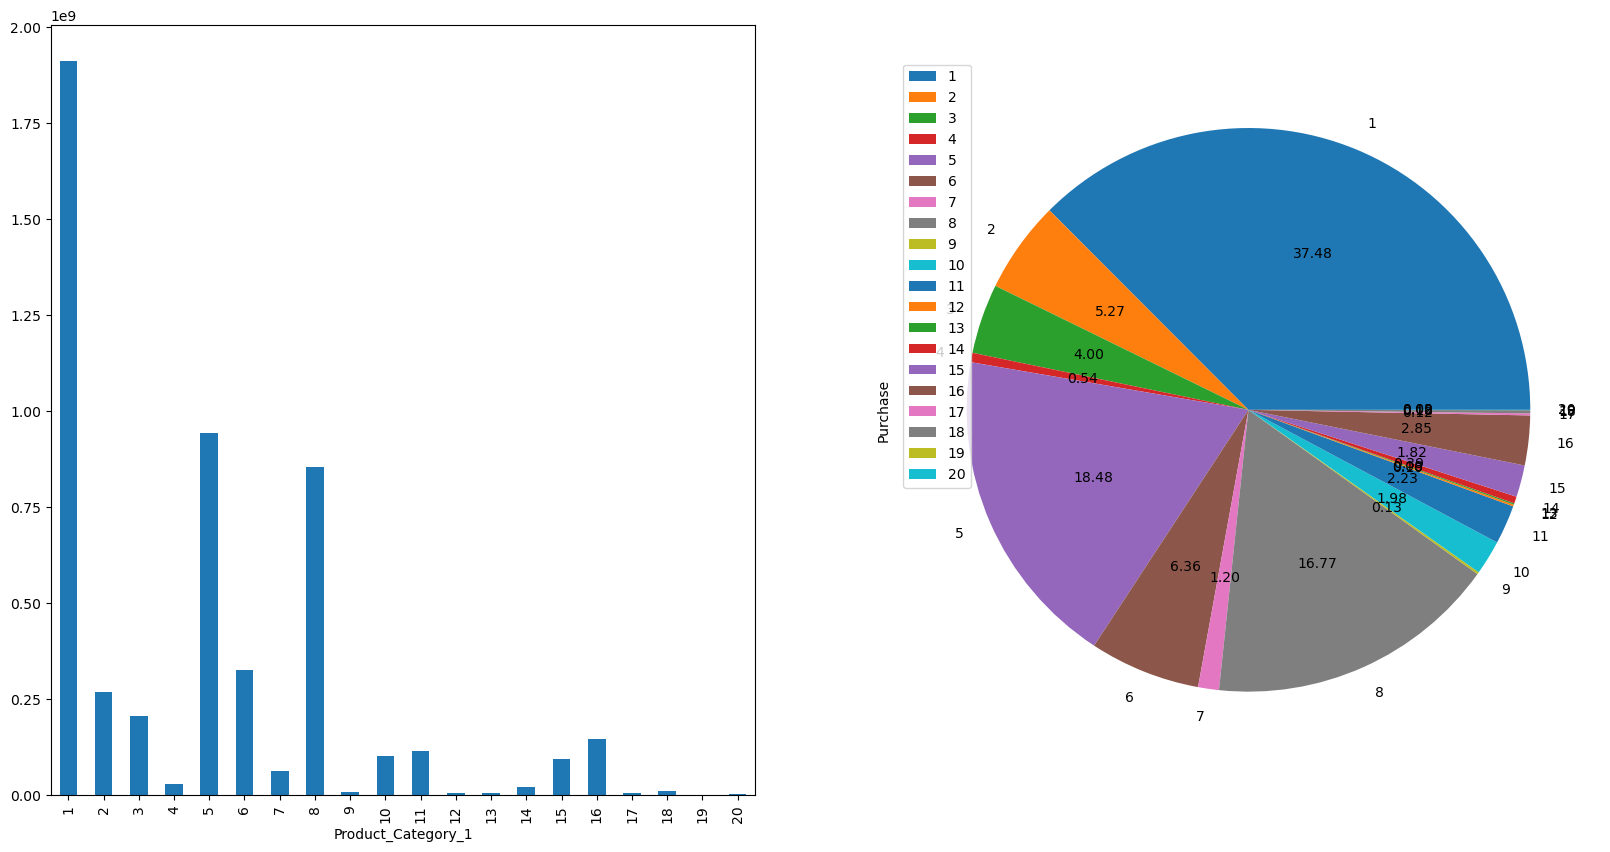

In [49]:
plt.subplot(121)
combined.groupby('Product_Category_1')['Purchase'].sum().plot(kind = 'bar')

plt.subplot(122)
combined.groupby('Product_Category_1')['Purchase'].sum().plot.pie(autopct = '%.2f',figsize = (20,10))
plt.legend()
plt.show()

#### Product Category 2 vs Purchase

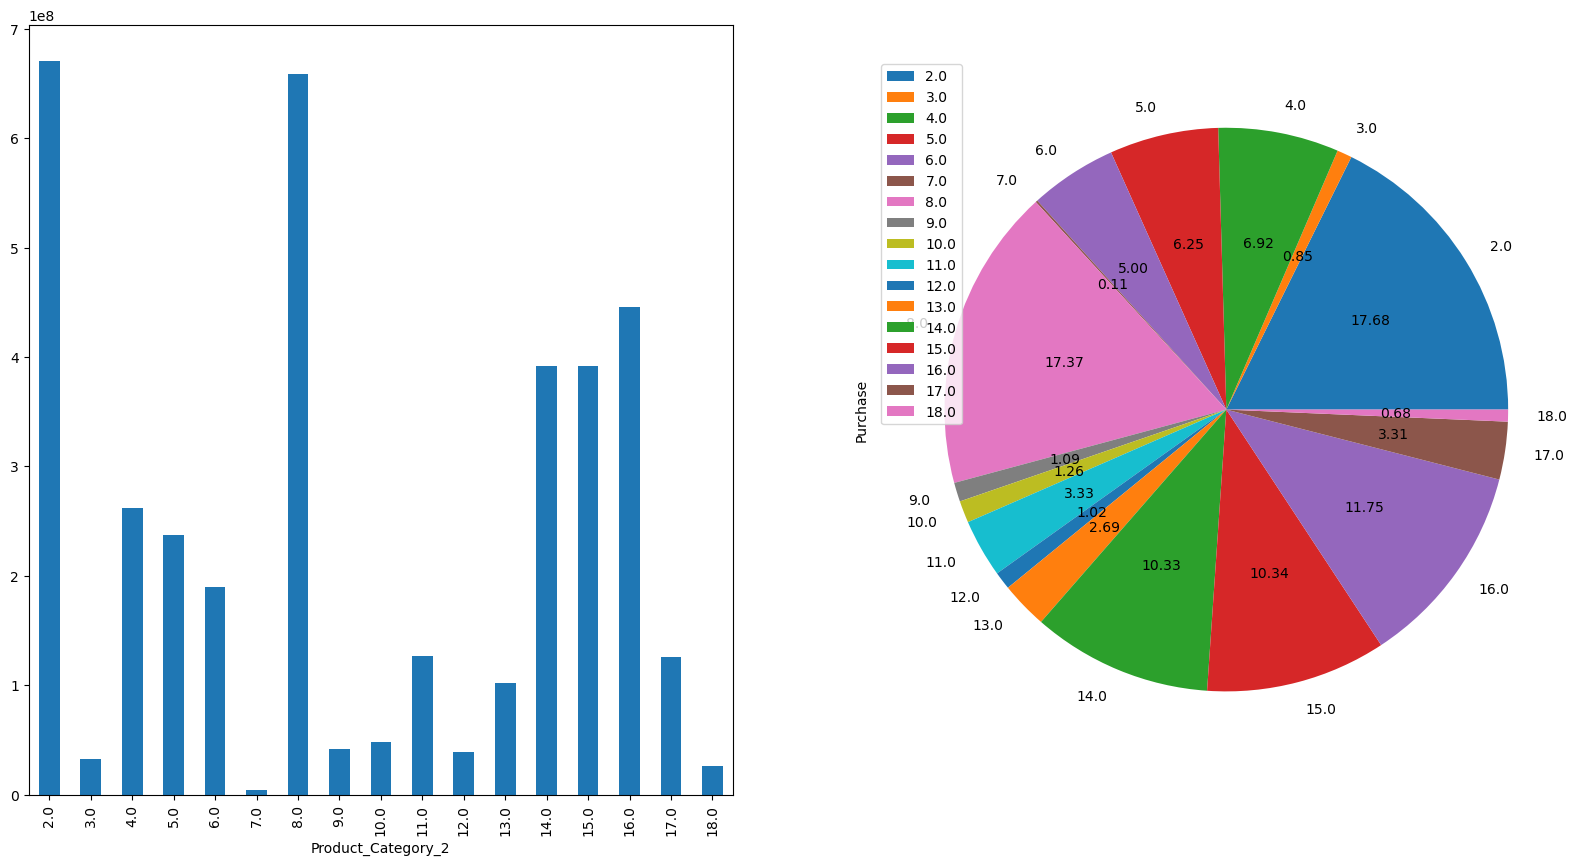

In [50]:
plt.subplot(121)
combined.groupby('Product_Category_2')['Purchase'].sum().plot(kind = 'bar')

plt.subplot(122)
combined.groupby('Product_Category_2')['Purchase'].sum().plot.pie(autopct = '%.2f',figsize = (20,10))
plt.legend()
plt.show()

#### Product Category 3 vs Purchase

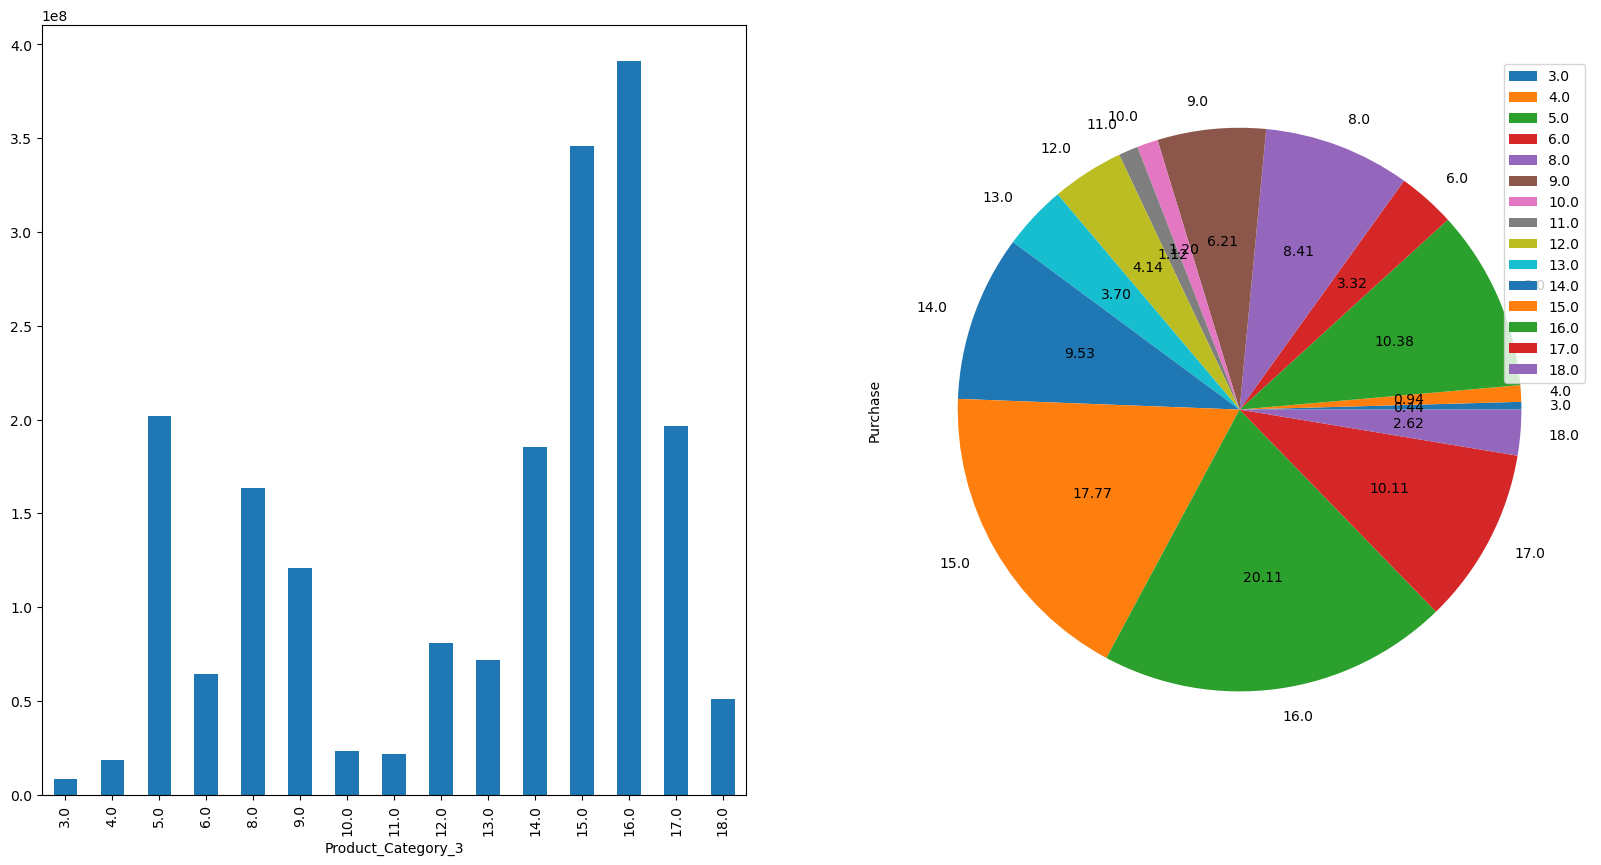

In [51]:
plt.subplot(121)
combined.groupby('Product_Category_3')['Purchase'].sum().plot(kind = 'bar')

plt.subplot(122)
combined.groupby('Product_Category_3')['Purchase'].sum().plot.pie(autopct = '%.2f',figsize = (20,10))
plt.legend()
plt.show()

### Multivariate 

#### Genderwise in each City Category wrt Purchase

<Axes: xlabel='City_Category', ylabel='Purchase'>

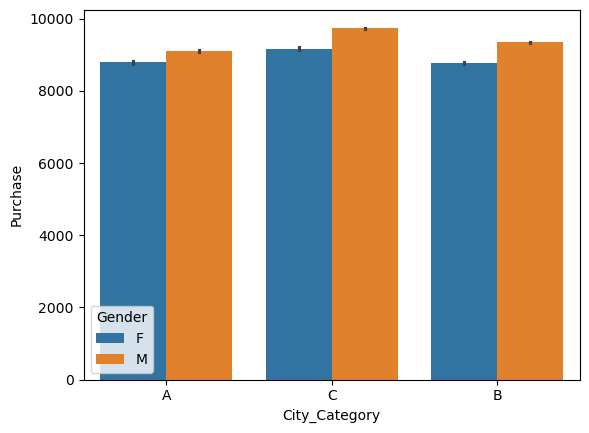

In [52]:
sns.barplot(x = combined['City_Category'],y = combined['Purchase'],hue = combined['Gender'])

<Axes: xlabel='Gender,City_Category'>

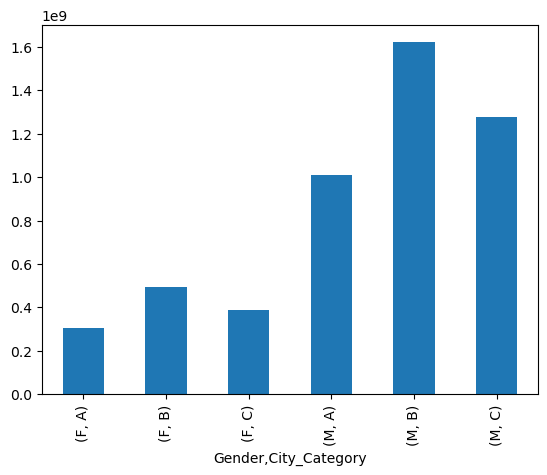

In [53]:
combined.groupby(['Gender','City_Category'])['Purchase'].sum().plot(kind = 'bar')

In [54]:
# combined.groupby(['City_Category','Product_Category_1'])['Purchase'].sum().plot(kind = 'bar',hue = combined['Gender'])

### Analysis

In [55]:
pd.crosstab(columns = train['Age'],index = train['City_Category'],values = train['Purchase'],aggfunc = 'count')

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,2544,27535,73745,26617,7607,6099,3573
B,5435,43247,91584,47598,20406,17741,5162
C,7123,28878,54258,35798,17688,14661,12769


In [56]:
pd.crosstab(columns = train['Age'],index = [train['City_Category'],train['Gender']],values =train['Purchase'],aggfunc = 'count')

Age                   0-17  18-25  26-35  36-45  46-50  51-55   55+
City_Category Gender                                               
A             F       1447   6269  17491   7105   1250   1778   364
              M       1097  21266  56254  19512   6357   4321  3209
B             F       1565  11686  21437  11110   6404   4243  1351
              M       3870  31561  70147  36488  14002  13498  3811
C             F       2071   6673  11824   8955   5545   3873  3368
              M       5052  22205  42434  26843  12143  10788  9401

In [57]:
pd.crosstab(columns = train['Age'],index = [train['City_Category'],train['Gender']],values =train['Purchase'],aggfunc = 'mean')

Age                          0-17        18-25         26-35         36-45  \
City_Category Gender                                                         
A             F       7826.252246  8151.940820   8701.506775   8716.853624   
              M       9655.655424  9034.719787   9030.545010   9089.917743   
B             F       8846.238339  8024.474499   8568.878015   8755.274887   
              M       8946.030233  9404.652039   9326.538127   9215.269979   
C             F       8313.388701  9080.970478   9056.760825   9406.433724   
              M       9365.363025  9881.569872  10052.349437  10040.668889   

Age                         46-50        51-55           55+  
City_Category Gender                                          
A             F       8735.585600  8710.023622   9240.678571  
              M       8272.417964  9837.063180   8400.335307  
B             F       8619.864616  8876.350695   9010.011103  
              M       9535.179831  9486.942732  10084.874049  
C             F       9122.771686  9377.025303   8980.591746  
              M       9720.595405  9925.189470   9530.313690

In [58]:
pd.crosstab(columns = train['Age'],index = [train['City_Category'],train['Gender']],values =train['Purchase'],aggfunc = 'sum')

Age                       0-17      18-25      26-35      36-45      46-50  \
City_Category Gender                                                         
A             F       11324587   51104517  152198055   61933245   10919482   
              M       10592254  192132351  508004279  177362475   52587761   
B             F       13844363   93774009  183691038   97271104   55201613   
              M       34621137  296820223  654228670  336246771  133511588   
C             F       17217028   60597316  107087140   84234614   50585769   
              M       47313814  219420259  426561396  269521675  118037190   

Age                       51-55       55+  
City_Category Gender                       
A             F        15486422   3363607  
              M        42505950  26956676  
B             F        37662356  12172525  
              M       128054753  38433455  
C             F        36317219  30246633  
              M       107072944  89594479

#### Product Category 2 wrt to Genders

In [59]:
train.loc[train.Gender=="F", "Product_Category_2"].describe().reset_index()

,index,Product_Category_2
0,count,91530.000000
1,mean,10.009166
2,std,4.871841
3,min,2.000000
4,25%,5.000000
5,50%,10.000000
6,75%,14.000000
7,max,18.000000


In [60]:
train.loc[train.Gender=="M", "Product_Category_2"].describe().reset_index()

,index,Product_Category_2
0,count,284900.000000
1,mean,9.788729
2,std,5.152545
3,min,2.000000
4,25%,5.000000
5,50%,9.000000
6,75%,15.000000
7,max,18.000000


### Statsical Test

In [61]:
# Using Logical Imputation
# Stastical Test to see relation between two columns

In [62]:
# Chi 2 Test
# Ho: That Prod Cat is Independent of the City Category
# Ha: That Prod Cat is Dependent on the City Category

table = pd.crosstab(train.City_Category, train.Product_Category_1)
teststats, pvalue, df, exp_freq = stats.chi2_contingency(table)
print(pvalue)

0.0


In [63]:
# Ha: That Prod Cat is Dependent on the City Category

<Axes: xlabel='City_Category'>

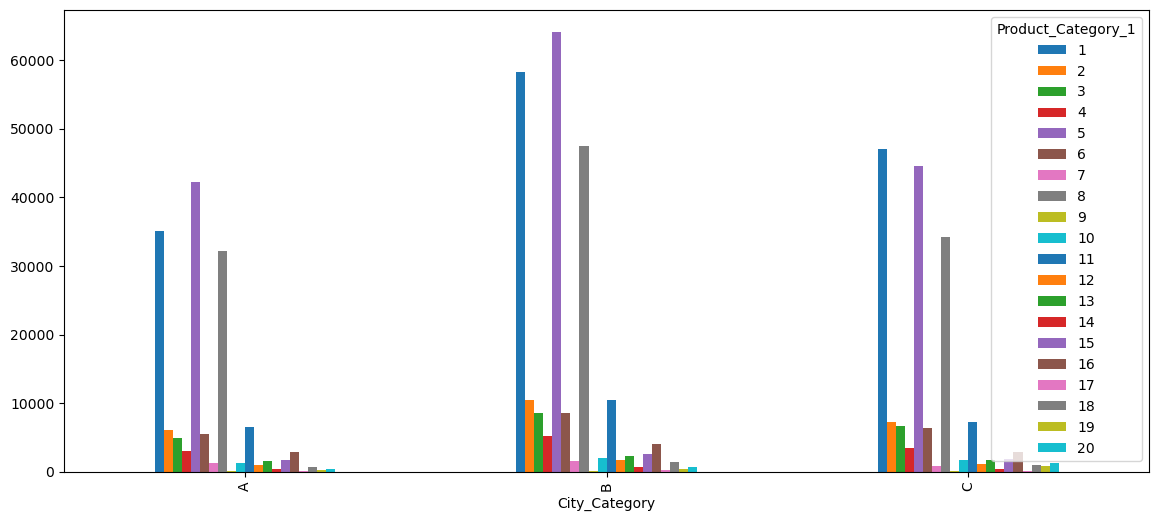

In [64]:
table.plot.bar(figsize = (14,6))

In [65]:
table_gender = pd.crosstab(train.Gender, train.Product_Category_1)
teststats, pvalue, df, exp_freq = stats.chi2_contingency(table_gender)
print(pvalue)

0.0


<Axes: xlabel='Gender'>

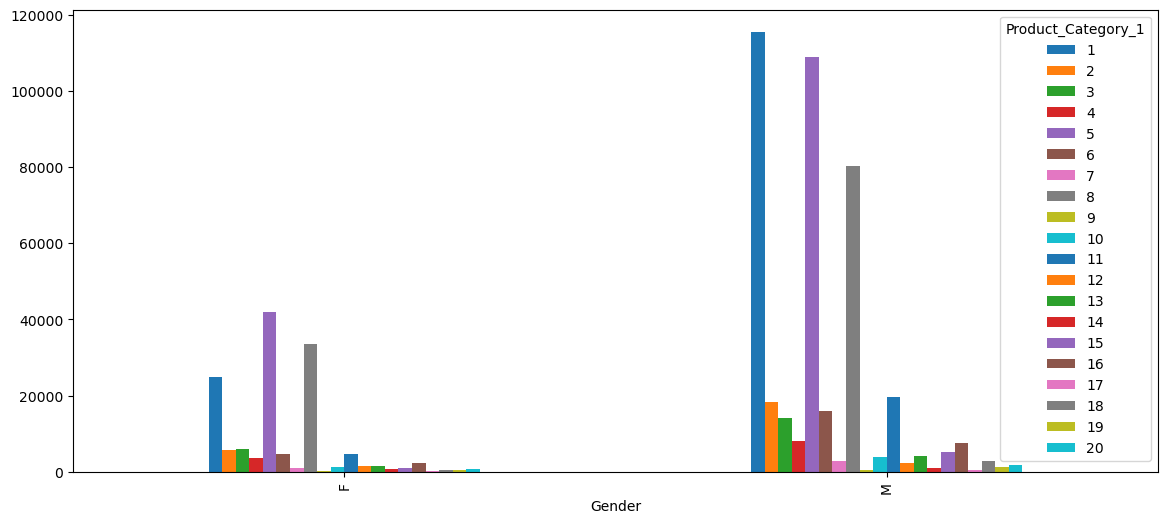

In [66]:
# Ha: That Prod Cat is Dependent on the Gender
table_gender.plot.bar(figsize = (14,6))

In [67]:
table_age = pd.crosstab(train.Age, train.Product_Category_1)
teststats, pvalue, df, exp_freq = stats.chi2_contingency(table_age)
print(pvalue)

0.0


<Axes: xlabel='Age'>

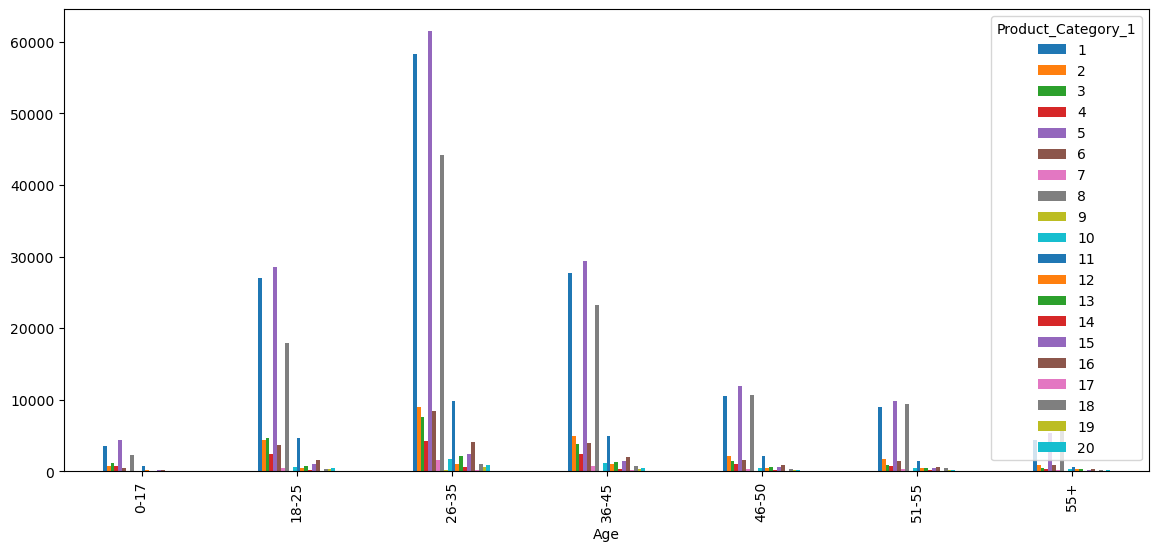

In [68]:
# Ha: That Prod Cat is Dependent on the Age
table_age.plot.bar(figsize = (14,6))

### Analysis

#### 1. Product Category 2 

In [69]:
combined.groupby(["City_Category", "Gender"])["Product_Category_2"].describe()

count       mean       std  min  25%   50%   75%  \
City_Category Gender                                                        
A             F        33582.0  10.124710  4.798571  2.0  6.0  11.0  14.0   
              M       106543.0   9.895713  5.092870  2.0  5.0   9.0  15.0   
B             F        55225.0   9.994006  4.853629  2.0  5.0  10.0  14.0   
              M       169990.0   9.768433  5.148369  2.0  5.0   9.0  15.0   
C             F        42014.0   9.923502  4.950752  2.0  5.0  10.0  14.0   
              M       130331.0   9.740852  5.215808  2.0  5.0   9.0  15.0   

                       max  
City_Category Gender        
A             F       18.0  
              M       18.0  
B             F       18.0  
              M       18.0  
C             F       18.0  
              M       18.0

In [70]:
combined.groupby(["City_Category", "Gender",'Age'])["Product_Category_2"].describe()

count       mean       std  min  25%   50%  \
City_Category Gender Age                                                   
A             F      0-17    1346.0   9.182021  4.964738  2.0  4.0   8.0   
                     18-25   6075.0   9.725761  4.872918  2.0  5.0   9.0   
                     26-35  16099.0  10.342319  4.703486  2.0  7.0  11.0   
                     36-45   6756.0  10.117081  4.892635  2.0  6.0  11.0   
                     46-50   1233.0  10.281427  4.750200  2.0  6.0  11.0   
                     51-55   1685.0  10.094362  4.758790  2.0  6.0  11.0   
                     55+      388.0  10.378866  4.852690  2.0  6.0  13.0   
              M      0-17    1089.0   9.011019  5.201798  2.0  4.0   8.0   
                     18-25  20615.0   9.536891  5.148911  2.0  5.0   8.0   
                     26-35  53134.0   9.855309  5.088792  2.0  5.0   9.0   
                     36-45  18459.0  10.121946  5.054908  2.0  6.0  11.0   
                     46-50   5980.0  10.373913  4.982054  2.0  6.0  11.0   
                     51-55   4215.0  10.245314  5.125995  2.0  6.0  11.0   
                     55+     3051.0  10.550639  4.893921  2.0  8.0  12.0   
B             F      0-17    1598.0   8.853567  4.905732  2.0  4.0   8.0   
                     18-25  11210.0   9.531222  4.913359  2.0  5.0   8.0   
                     26-35  20418.0  10.045401  4.801016  2.0  6.0  11.0   
                     36-45  10924.0  10.076254  4.936987  2.0  5.0  11.0   
                     46-50   5930.0  10.268297  4.808916  2.0  6.0  11.0   
                     51-55   3915.0  10.546105  4.664537  2.0  8.0  12.0   
                     55+     1230.0  11.030081  4.531589  2.0  8.0  13.0   
              M      0-17    3846.0   9.295632  5.245268  2.0  4.0   8.0   
                     18-25  31165.0   9.468891  5.174398  2.0  5.0   8.0   
                     26-35  69287.0   9.717970  5.152141  2.0  5.0   8.0   
                     36-45  35270.0   9.905812  5.114297  2.0  5.0   9.0   
                     46-50  13798.0   9.897449  5.109356  2.0  5.0   9.0   
                     51-55  13040.0  10.208819  5.116530  2.0  6.0  11.0   
                     55+     3584.0  10.405134  5.111040  2.0  6.0  11.0   
C             F      0-17    2177.0   8.382637  4.843804  2.0  4.0   8.0   
                     18-25   6783.0   9.577621  5.027422  2.0  5.0   8.0   
                     26-35  11741.0   9.852823  4.957946  2.0  5.0   9.0   
                     36-45   9010.0   9.917092  4.969628  2.0  5.0  10.0   
                     46-50   5476.0  10.336194  4.883035  2.0  6.0  12.0   
                     51-55   3712.0  10.423761  4.851789  2.0  6.0  12.0   
                     55+     3115.0  10.716854  4.687480  2.0  8.0  13.0   
              M      0-17    5002.0   9.144142  5.275514  2.0  4.0   8.0   
                     18-25  22955.0   9.265302  5.279107  2.0  4.0   8.0   
                     26-35  43551.0   9.607104  5.227851  2.0  5.0   8.0   
                     36-45  27197.0   9.844137  5.214541  2.0  5.0   9.0   
                     46-50  12059.0  10.272991  5.126006  2.0  6.0  11.0   
                     51-55  10715.0  10.249650  5.096962  2.0  6.0  11.0   
                     55+     8852.0  10.311116  5.038247  2.0  6.0  11.0   

                             75%   max  
City_Category Gender Age                
A             F      0-17   14.0  18.0  
                     18-25  14.0  18.0  
                     26-35  14.0  18.0  
                     36-45  14.0  18.0  
                     46-50  14.0  18.0  
                     51-55  14.0  18.0  
                     55+    14.0  17.0  
              M      0-17   14.0  18.0  
                     18-25  15.0  18.0  
                     26-35  15.0  18.0  
                     36-45  15.0  18.0  
                     46-50  15.0  18.0  
                     51-55  15.0  18.0  
                     55+    15.0  18.0  
B             F      0-17   1

-----

#### 2. Product Category 3

In [71]:
combined.groupby(["City_Category", "Gender"])["Product_Category_3"].describe()

count       mean       std  min  25%   50%   75%   max
City_Category Gender                                                          
A             F       13132.0  12.540512  4.060481  3.0  9.0  14.0  16.0  18.0
              M       46094.0  12.721070  4.106983  3.0  9.0  15.0  16.0  18.0
B             F       22364.0  12.494098  4.112220  3.0  9.0  14.0  16.0  18.0
              M       76261.0  12.715792  4.114596  3.0  9.0  15.0  16.0  18.0
C             F       18125.0  12.369876  4.187020  3.0  9.0  14.0  16.0  18.0
              M       61882.0  12.749119  4.146869  3.0  9.0  15.0  16.0  18.0

In [72]:
combined.groupby(["City_Category", "Gender",'Age'])["Product_Category_3"].describe()

count       mean       std  min   25%   50%  \
City_Category Gender Age                                                    
A             F      0-17     540.0  11.412963  4.360582  3.0   8.0  12.0   
                     18-25   2514.0  12.292363  4.139341  3.0   9.0  14.0   
                     26-35   6048.0  12.696263  3.996837  3.0   9.0  14.0   
                     36-45   2749.0  12.653692  4.046235  3.0   9.0  14.0   
                     46-50    476.0  12.647059  3.982252  3.0   9.0  14.0   
                     51-55    646.0  12.297214  4.032991  3.0   9.0  14.0   
                     55+      159.0  13.081761  3.948992  5.0  12.0  14.0   
              M      0-17     495.0  11.886869  4.407774  3.0   8.0  14.0   
                     18-25   9194.0  12.505547  4.224787  3.0   9.0  14.0   
                     26-35  23048.0  12.651033  4.124680  3.0   9.0  14.0   
                     36-45   7752.0  12.947368  3.975972  3.0   9.0  15.0   
                     46-50   2491.0  13.020072  3.907515  3.0  10.0  15.0   
                     51-55   1859.0  13.116729  4.049855  3.0   9.0  15.0   
                     55+     1255.0  13.337849  3.829370  3.0  11.0  15.0   
B             F      0-17     704.0  11.595170  4.243583  3.0   8.0  12.0   
                     18-25   4567.0  12.053646  4.254287  3.0   9.0  14.0   
                     26-35   8225.0  12.472584  4.099268  3.0   9.0  14.0   
                     36-45   4547.0  12.614031  4.119413  3.0   9.0  14.0   
                     46-50   2364.0  12.978426  3.899385  3.0   9.0  14.0   
                     51-55   1516.0  13.033641  3.861230  4.0  10.0  14.0   
                     55+      441.0  13.204082  3.774205  4.0  11.0  14.0   
              M      0-17    1718.0  12.261350  4.295414  3.0   9.0  14.0   
                     18-25  14288.0  12.520297  4.193758  3.0   9.0  14.0   
                     26-35  31547.0  12.670714  4.129810  3.0   9.0  15.0   
                     36-45  15448.0  12.787416  4.070063  3.0   9.0  15.0   
                     46-50   6095.0  12.870057  4.044450  3.0   9.0  15.0   
                     51-55   5634.0  13.079872  3.973730  3.0   9.0  15.0   
                     55+     1531.0  13.302417  3.886711  3.0  10.0  15.0   
C             F      0-17     987.0  10.971631  4.348090  3.0   8.0  12.0   
                     18-25   3017.0  12.135234  4.281802  3.0   9.0  14.0   
                     26-35   5124.0  12.291569  4.216621  3.0   9.0  14.0   
                     36-45   3940.0  12.403553  4.168157  3.0   9.0  14.0   
                     46-50   2334.0  12.747644  4.015207  3.0   9.0  14.0   
                     51-55   1512.0  12.812831  4.024744  3.0   9.0  14.0   
                     55+     1211.0  13.034682  3.951414  3.0   9.5  14.0   
              M      0-17    2415.0  12.087785  4.419181  3.0   8.0  14.0   
                     18-25  11309.0  12.411177  4.297605  3.0   9.0  15.0   
                     26-35  21289.0  12.717695  4.148397  3.0   9.0  15.0   
                     36-45  12838.0  12.778860  4.136651  3.0   9.0  15.0   
                     46-50   5396.0  13.065789  3.981273  3.0   9.0  15.0   
                     51-55   4872.0  13.265394  3.871680  3.0  10.0  15.0   
                     55+     3763.0  13.142971  3.953312  3.0   9.0  15.0   

                             75%   max  
City_Category Gender Age                
A             F      0-17   15.0  18.0  
                     18-25  16.0  18.0  
                     26-35  16.0  18.0  
                     36-45  16.0  18.0  
                     46-50  16.0  18.0  
                     51-55  16.0  18.0  
                     55+    16.0  18.0  
              M      0-17   16.0  18.0  
                     18-25  16.0  18.0  
                     26-35  16.0  18.0  
                     36-45  16.0  18.0  
                     46-50  16.0  18.0  
                     51-55  16.0  18.0  
                     55+  

### Top Products in each category for all city category

In [73]:
train.groupby("City_Category")["Product_Category_1"].value_counts()

City_Category  Product_Category_1
A              5                     42211
               1                     35081
               8                     32179
               11                     6601
               2                      6141
               6                      5507
               3                      4943
               4                      3050
               16                     2848
               15                     1717
               13                     1614
               10                     1333
               7                      1226
               12                     1063
               18                      753
               14                      481
               20                      468
               19                      273
               17                      121
               9                       110
B              5                     64138
               1                     58253
               8    

In [74]:
train.groupby("City_Category")["Product_Category_2"].value_counts()

City_Category  Product_Category_2
A              8.0                   17367
               14.0                  15288
               2.0                   11981
               16.0                  11547
               15.0                   9341
               5.0                    6841
               4.0                    6313
               6.0                    4378
               11.0                   3668
               17.0                   3328
               13.0                   2857
               12.0                   1589
               9.0                    1480
               10.0                    780
               18.0                    712
               3.0                     710
               7.0                     181
B              8.0                   26728
               14.0                  23078
               2.0                   20170
               16.0                  18014
               15.0                  15565
               5.0  

In [75]:
train.groupby("City_Category")["Product_Category_3"].value_counts()

City_Category  Product_Category_3
A              16.0                   8332
               15.0                   6797
               14.0                   5021
               5.0                    4073
               17.0                   3822
               8.0                    3071
               9.0                    2697
               12.0                   2355
               13.0                   1435
               6.0                    1266
               18.0                   1143
               4.0                     477
               11.0                    454
               10.0                    424
               3.0                     152
B              16.0                  13580
               15.0                  11617
               14.0                   7767
               5.0                    6794
               17.0                   6743
               8.0                    5123
               9.0                    4790
               12.0 

#### <font color = 'red'> Inference </font> :
- The Top Five products in all Product Category for all City Category are Same irrespective of Gender
- These Top 5 Products are popular and most purchased by both Female and Male wether bought for themselves or loved ones

### Treating Age Column

In [76]:
combined['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [5]:
combined['Age'] = combined['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [6]:
combined['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

### Null Value Imputation

In [9]:
df_null

,Null_Values,Percentage
Product_Category_3,545809,0.696481
Product_Category_2,245982,0.313886
Purchase,233599,0.298085
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000


* 1 way is that, We can fill it with mode
* 2 way is that, We can fillna with -neg value like -2.0/-1.0 then model will understand its null value
* 3 way is we can try to fill with logical imputation (Statiscal test to prove it)
* 4 way is we can use knn,random forest to impute null values

In [10]:
df_1 = combined.copy()

#### Product Category 2 (df_1)
- gender,city_category

In [11]:
d_g_m = df_1.Gender == 'M' 
d_g_f = df_1.Gender == 'F'

d_c_a = df_1.City_Category == 'A'
d_c_b = df_1.City_Category == 'B'
d_c_c = df_1.City_Category == 'C'

df_1.loc[(d_g_f) & (d_c_a) & (df_1.Product_Category_2.isnull()),'Product_Category_2'] = 11.0

df_1.loc[(d_g_m) & (d_c_a) & (df_1.Product_Category_2.isnull()),'Product_Category_2'] = 9.0

df_1.loc[(d_g_f) & (d_c_b) & (df_1.Product_Category_2.isnull()),'Product_Category_2'] = 10.0

df_1.loc[(d_g_m) & (d_c_b) & (df_1.Product_Category_2.isnull()),'Product_Category_2'] = 9.0

df_1.loc[(d_g_f) & (d_c_c) & (df_1.Product_Category_2.isnull()),'Product_Category_2'] = 10.0

df_1.loc[(d_g_m) & (d_c_c) & (df_1.Product_Category_2.isnull()),'Product_Category_2'] = 9.0

#### Product Category 2 (combined)
- Filled with gender,city_category,age

In [12]:
c_g_m = combined.Gender == 'M' 
c_g_f = combined.Gender == 'F'

c_c_a = combined.City_Category == 'A'
c_c_b = combined.City_Category == 'B'
c_c_c = combined.City_Category == 'C'

c_a_1 = combined.Age == 1
c_a_2 = combined.Age == 2
c_a_3 = combined.Age == 3
c_a_4 = combined.Age == 4
c_a_5 = combined.Age == 5
c_a_6 = combined.Age == 6
c_a_7 = combined.Age == 7

combined.loc[(c_g_f) & (c_c_a) & (c_a_1) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_2) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 9.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_3) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_4) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_5) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_6) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_7) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 13.0

combined.loc[(c_g_m) & (c_c_a) & (c_a_1) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_2) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_3) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 9.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_4) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_5) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_6) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_7) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 12.0

combined.loc[(c_g_f) & (c_c_b) & (c_a_1) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_2) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_3) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_4) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_5) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_6) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 12.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_7) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 13.0

combined.loc[(c_g_m) & (c_c_b) & (c_a_1) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_2) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_3) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_4) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 9.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_5) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 9.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_6) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_7) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0

combined.loc[(c_g_f) & (c_c_c) & (c_a_1) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_2) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_3) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 9.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_4) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 10.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_5) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 12.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_6) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 12.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_7) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 13.0

combined.loc[(c_g_m) & (c_c_c) & (c_a_1) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_2) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_3) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 8.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_4) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 9.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_5) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_6) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_7) & (combined.Product_Category_2.isnull()),'Product_Category_2'] = 11.0

#### Product Category 3 (df_1)
- gender,city_category

In [13]:
d_g_m = df_1.Gender == 'M' 
d_g_f = df_1.Gender == 'F'

d_c_a = df_1.City_Category == 'A'
d_c_b = df_1.City_Category == 'B'
d_c_c = df_1.City_Category == 'C'

df_1.loc[(d_g_f) & (d_c_a) & (df_1.Product_Category_3.isnull()),'Product_Category_3'] = 14.0

df_1.loc[(d_g_m) & (d_c_a) & (df_1.Product_Category_3.isnull()),'Product_Category_3'] = 15.0

df_1.loc[(d_g_f) & (d_c_b) & (df_1.Product_Category_3.isnull()),'Product_Category_3'] = 14.0

df_1.loc[(d_g_m) & (d_c_b) & (df_1.Product_Category_3.isnull()),'Product_Category_3'] = 15.0

df_1.loc[(d_g_f) & (d_c_c) & (df_1.Product_Category_3.isnull()),'Product_Category_3'] = 14.0

df_1.loc[(d_g_m) & (d_c_c) & (df_1.Product_Category_3.isnull()),'Product_Category_3'] = 15.0

#### Product Category 3 (combined)
- Filled with gender,city_category,age

In [14]:
combined.loc[(c_g_f) & (c_c_a) & (c_a_1) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 12.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_2) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_3) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_4) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_5) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_6) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_a) & (c_a_7) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0

combined.loc[(c_g_m) & (c_c_a) & (c_a_1) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_2) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_3) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_4) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_5) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_6) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_a) & (c_a_7) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0

combined.loc[(c_g_f) & (c_c_b) & (c_a_1) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 12.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_2) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_3) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_4) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_5) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_6) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_b) & (c_a_7) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0

combined.loc[(c_g_m) & (c_c_b) & (c_a_1) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_2) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_3) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_4) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_5) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_6) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_b) & (c_a_7) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0

combined.loc[(c_g_f) & (c_c_c) & (c_a_1) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 12.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_2) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_3) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_4) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_5) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_6) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_f) & (c_c_c) & (c_a_7) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0

combined.loc[(c_g_m) & (c_c_c) & (c_a_1) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 14.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_2) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_3) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_4) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_5) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_6) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0
combined.loc[(c_g_m) & (c_c_c) & (c_a_7) & (combined.Product_Category_3.isnull()),'Product_Category_3'] = 15.0

### Heatmap

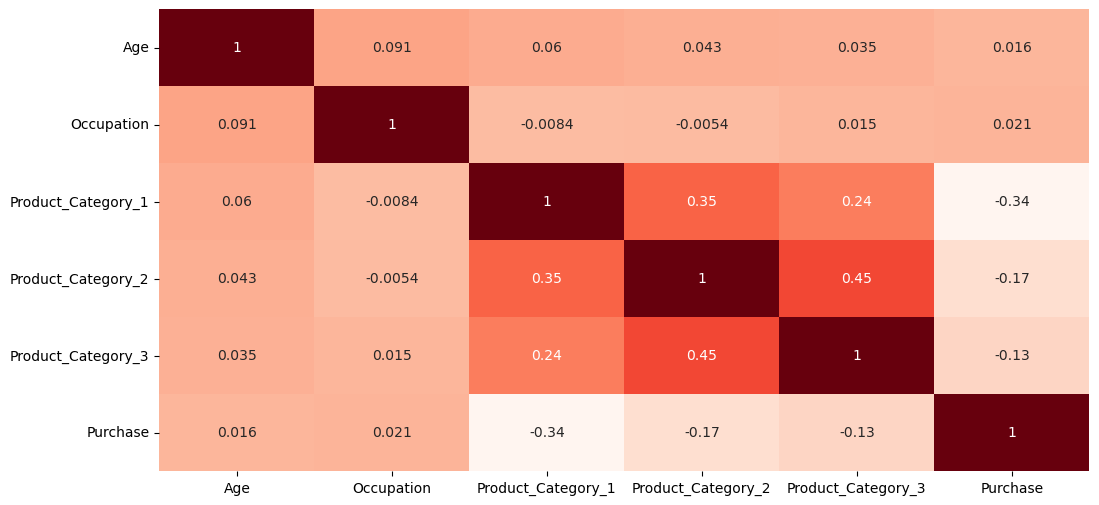

In [85]:
plt.figure(figsize = (12,6))
sns.heatmap(df_1.drop('User_ID',axis = 1).corr(numeric_only = True),annot = True,cmap = 'Reds',cbar = False)
plt.show()

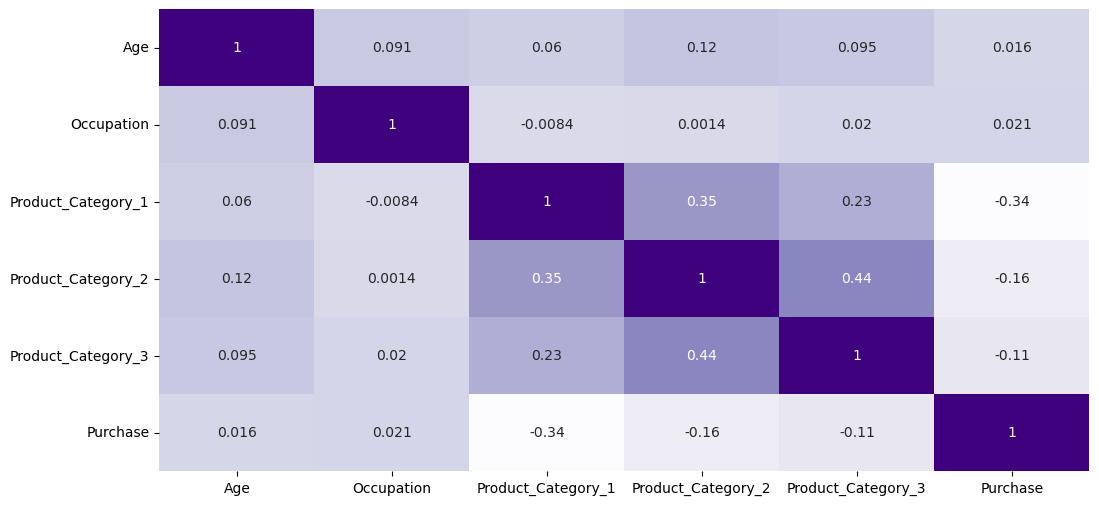

In [86]:
plt.figure(figsize = (12,6))
sns.heatmap(combined.drop('User_ID',axis = 1).corr(numeric_only = True),annot = True,cmap = 'Purples',cbar = False)
plt.show()

### Box Plot

In [87]:
train_num.drop(['User_ID','Purchase'],axis = 1,inplace = True)

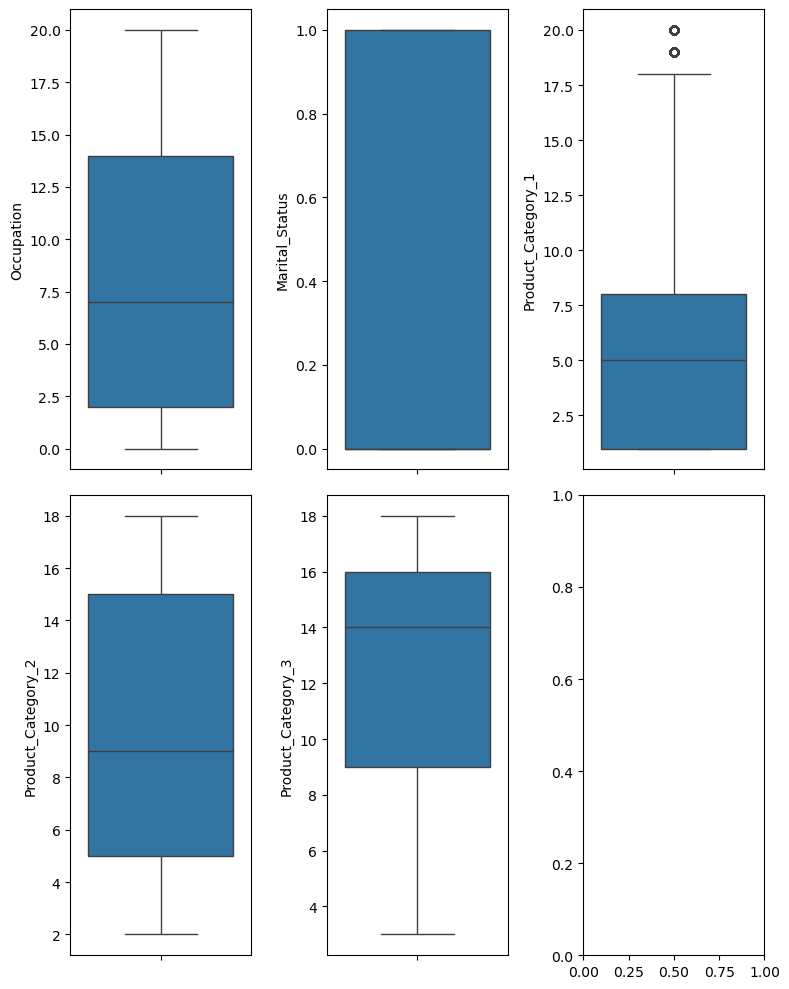

In [88]:
fig,ax = plt.subplots(2,3,figsize = (8,10))
for i,a in zip(train_num.columns,ax.flatten()):
    sns.boxplot(train_num[i],ax = a)
plt.tight_layout()
plt.show()

### Feature Engineering

In [15]:
combined['User_ID'] = combined['User_ID'] - 1000000

In [16]:
combined['Product_ID'] = combined['Product_ID'].str.replace('P00', '')

In [17]:
prod = combined['Product_ID'].value_counts().index[:5]

In [18]:
prod

Index(['265242', '025442', '110742', '112142', '046742'], dtype='object')

In [19]:
def products(x):
    if x in prod:
        return("Top5")
    else:
        return("Others")

In [20]:
combined["Products"] = combined.Product_ID.apply(products)

In [21]:
combined

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Products
0,1,069042,F,1,10,A,2,0,3,8.0,12.0,8370.0,Others
1,1,248942,F,1,10,A,2,0,1,6.0,14.0,15200.0,Others
2,1,087842,F,1,10,A,2,0,12,8.0,12.0,1422.0,Others
3,1,085442,F,1,10,A,2,0,12,14.0,12.0,1057.0,Others
4,2,285442,M,7,16,C,4+,0,8,11.0,15.0,7969.0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,6036,118942,F,3,15,B,4+,1,8,11.0,14.0,NaN,Others
233595,6036,254642,F,3,15,B,4+,1,5,8.0,14.0,NaN,Others
233596,6036,031842,F,3,15,B,4+,1,1,5.0,12.0,NaN,Others
233597,6037,124742,F,5,1,C,4+,0,10,16.0,14.0,NaN,Others


<Axes: xlabel='Products', ylabel='Purchase'>

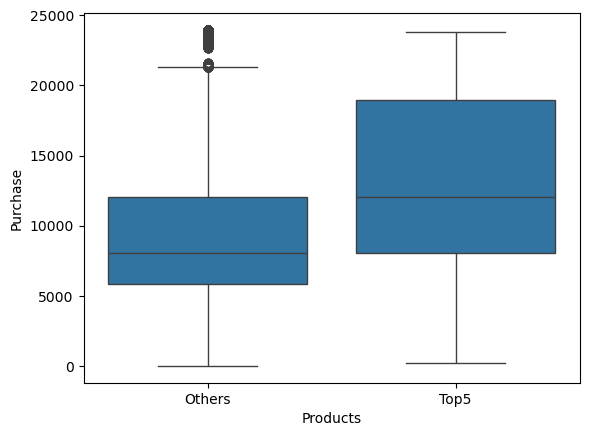

In [94]:
sns.boxplot(x = "Products", y = "Purchase", data = combined)

### Dropping unwanted columns

In [108]:
combined.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Products                       object
dtype: object

In [22]:
# Dropping unwanted columns
combined.drop(['User_ID','Product_ID','Stay_In_Current_City_Years'],axis = 1,inplace = True)

### Scaling

In [23]:
def data_preprocess(X,y):
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=100)
    from sklearn.preprocessing import StandardScaler,MinMaxScaler
    mm = MinMaxScaler()
    
    mm.fit(xtrain)
    
    train_scaled = mm.transform(xtrain)
    test_scaled = mm.transform(xtest)
    train_scaled = pd.DataFrame(train_scaled,columns = X.columns).reset_index(drop = True)   # A good practise to do
    test_scaled = pd.DataFrame(test_scaled,columns = X.columns).reset_index(drop = True)      # while doing logistic regression or ols method or logit we get error like homogenous indices not match
    ytrain = ytrain.reset_index(drop = True)
    ytest = ytest.reset_index(drop = True)
    
    return(train_scaled,test_scaled,ytrain,ytest)

### Encoding

In [135]:
combined.head(1)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Products
0,0,1,10,0,0,3,8.0,12.0,8370.0,0


In [24]:
combined['Gender'] = combined['Gender'].replace({'F':0,'M':1})
combined['City_Category'] = combined['City_Category'].replace({'A':0,'B':1,'C':2})
combined['Products'] = combined['Products'].replace({'Others':0,'Top5':1})

In [25]:
combined.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Products
0,0,1,10,0,0,3,8.0,12.0,8370.0,0
1,0,1,10,0,0,1,6.0,14.0,15200.0,0
2,0,1,10,0,0,12,8.0,12.0,1422.0,0
3,0,1,10,0,0,12,14.0,12.0,1057.0,0
4,1,7,16,2,0,8,11.0,15.0,7969.0,0


### Train Test Split

In [26]:
combined = combined.dropna(subset = ['Purchase'])

In [27]:
x = combined.drop('Purchase',axis = 1)
y = combined['Purchase']

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 15)

In [29]:
xtrain.head(2)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Products
104121,1,2,3,1,0,5,8.0,14.0,0
382727,0,3,4,2,0,1,6.0,14.0,0


In [30]:
xtrain_scaling = xtrain.drop(['Gender','City_Category','Marital_Status','Products'],axis = 1)
xtest_scaling = xtest.drop(['Gender','City_Category','Marital_Status','Products'],axis = 1)

sc = StandardScaler()
sc.fit(xtrain_scaling)

train_scaled = sc.transform(xtrain_scaling)
test_scaled = sc.transform(xtest_scaling)
train_scaled = pd.DataFrame(train_scaled,columns = xtrain_scaling.columns).reset_index(drop = True)   # A good practise to do
test_scaled = pd.DataFrame(test_scaled,columns = xtest_scaling.columns).reset_index(drop = True)      # while doing logistic regression or ols method or logit we get error like homogenous indices not match
ytrain = ytrain.reset_index(drop = True)
ytest = ytest.reset_index(drop = True)

In [31]:
xtrain_cat = xtrain[['Gender','City_Category','Marital_Status','Products']]
xtest_cat = xtest[['Gender','City_Category','Marital_Status','Products']]

In [32]:
train_scaled = pd.concat([train_scaled.reset_index(drop=True), xtrain_cat.reset_index(drop=True)], axis=1)
test_scaled = pd.concat([test_scaled.reset_index(drop=True), xtest_cat.reset_index(drop=True)], axis=1)

In [33]:
xtrain_cat.shape,xtest_cat.shape,train_scaled.shape,test_scaled.shape

((385047, 4), (165021, 4), (385047, 9), (165021, 9))

In [34]:
train_scaled['Marital_Status'] = train_scaled['Marital_Status'].astype('int64')

In [35]:
test_scaled['Marital_Status'] = test_scaled['Marital_Status'].astype('int64')

### Models

In [36]:
lr = LinearRegression()
lr_model = lr.fit(train_scaled,ytrain)
lr_train_pred = lr_model.predict(train_scaled)
lr_test_pred = lr_model.predict(test_scaled)
print('TRAIN RMSE:',np.sqrt(mean_squared_error(ytrain,lr_train_pred)))
print('TEST RMSE:',np.sqrt(mean_squared_error(ytest,lr_test_pred)))

TRAIN RMSE: 4675.077509719104
TEST RMSE: 4686.135004776448


In [37]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(train_scaled,ytrain)
dt_pred_train = dt_model.predict(train_scaled)
dt_pred_test = dt_model.predict(test_scaled)
print('Train Score',dt_model.score(train_scaled,ytrain))
print('Test Score',dt_model.score(test_scaled,ytest))

# pred_xgbr = xgb_r.fit(X, y).predict(newtest)
# solution = pd.DataFrame({"Purchase":pred_xgbr, 
#                          "User_ID":test.User_ID, "Product_ID": test.Product_ID})
# solution.to_csv("XGBMODEL.csv", index=False)

Train Score 0.747922187733902
Test Score 0.6016095575492652


In [38]:
print('Train RMSE',np.sqrt(mean_squared_error(ytrain,dt_pred_train)))
print('Test RMSE',np.sqrt(mean_squared_error(ytest,dt_pred_test)))

Train RMSE 2519.3619871000556
Test RMSE 3178.030297003183


<Axes: >

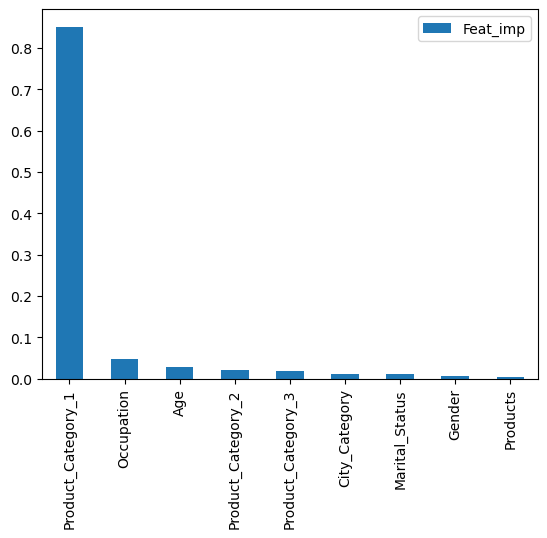

In [39]:
df = pd.DataFrame(data = dt_model.feature_importances_, 
                  columns = ["Feat_imp"], index = dt_model.feature_names_in_)
df.sort_values(by = "Feat_imp", ascending = False,kind = "quicksort").plot(kind = "bar")

In [40]:
rf = RandomForestRegressor()
rf_model = rf.fit(train_scaled,ytrain)
rf_pred_train = rf_model.predict(train_scaled)
rf_pred_test = rf_model.predict(test_scaled)
print('Train Score',rf_model.score(train_scaled,ytrain))
print('Test Score',rf_model.score(test_scaled,ytest))

Train Score 0.7422058839351341
Test Score 0.6384901841604338


In [41]:
print('Train RMSE',np.sqrt(mean_squared_error(ytrain,rf_pred_train)))
print('Test RMSE',np.sqrt(mean_squared_error(ytest,rf_pred_test)))

Train RMSE 2547.767317060967
Test RMSE 3027.3569065986985


<Axes: >

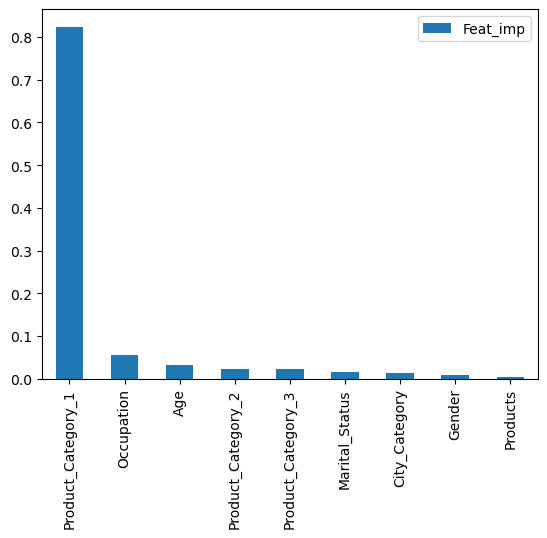

In [42]:
df1 = pd.DataFrame(data = rf_model.feature_importances_, 
                  columns = ["Feat_imp"], index = rf_model.feature_names_in_)
df1.sort_values(by = "Feat_imp", ascending = False,kind = "quicksort").plot(kind = "bar")

In [43]:
xg = XGBRegressor()
xg_model = xg.fit(train_scaled,ytrain)
xg_pred_train = xg_model.predict(train_scaled)
xg_pred_test = xg_model.predict(test_scaled)
print('Train Score',xg_model.score(train_scaled,ytrain))
print('Test Score',xg_model.score(test_scaled,ytest))

Train Score 0.6760843577083764
Test Score 0.6712004517580459


In [44]:
print('Train RMSE',np.sqrt(mean_squared_error(ytrain,xg_pred_train)))
print('Test RMSE',np.sqrt(mean_squared_error(ytest,xg_pred_test)))

Train RMSE 2855.8751818880314
Test RMSE 2887.1489082530934


In [45]:
df2 = pd.DataFrame(data = xg_model.feature_importances_,columns = ['Feat_Imp'],index = xg_model.feature_names_in_)
df2

,Feat_Imp
Age,0.005376
Occupation,0.004280
Product_Category_1,0.870470
Product_Category_2,0.015852
Product_Category_3,0.015372
Gender,0.004453
City_Category,0.010442
Marital_Status,0.004549
Products,0.069206


<Axes: >

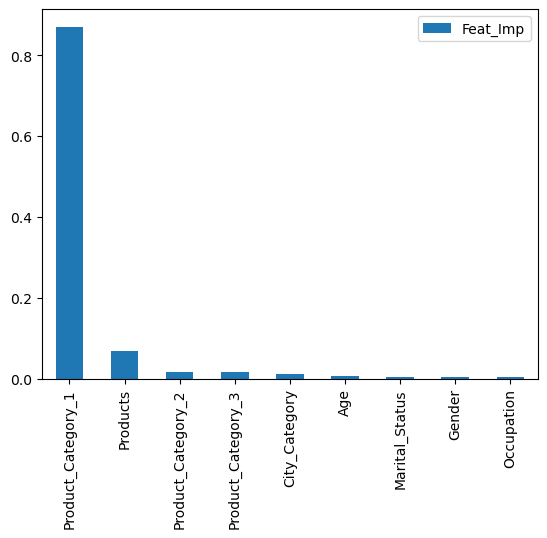

In [46]:
df2.sort_values(by = "Feat_Imp", ascending = False,kind = "quicksort").plot(kind = "bar")

### Hyper Parameter Tunning

In [54]:
params = [{"learning_rate":[0.1, 0.2, 0.01, 0.3, 0.5],
          "max_depth":[4, 5, 6, 8,10,12,14,15],
          "max_leave":[0]}]

xgb_grid = XGBRegressor()
grid = GridSearchCV(estimator = xgb_grid,param_grid = params,cv = 10,scoring = 'neg_mean_squared_error')
grid.fit(train_scaled,ytrain)
best_parameters = grid.best_params_
print(best_parameters)

{'learning_rate': 0.2, 'max_depth': 8, 'max_leave': 0}


In [55]:
xg_tunned = XGBRegressor(**best_parameters)
xg_model_tunned = xg_tunned.fit(train_scaled,ytrain)
tunned_xg_pred_train = xg_model_tunned.predict(train_scaled)
tunned_xg_pred_test = xg_model_tunned.predict(test_scaled)
print('Train Score',xg_model_tunned.score(train_scaled,ytrain))
print('Test Score',xg_model_tunned.score(test_scaled,ytest))

Train Score 0.6870937408528693
Test Score 0.6728878480855248


In [56]:
print('Train RMSE',np.sqrt(mean_squared_error(ytrain,tunned_xg_pred_train)))
print('Test RMSE',np.sqrt(mean_squared_error(ytest,tunned_xg_pred_test)))

Train RMSE 2806.9222755129
Test RMSE 2879.7309676812342


In [57]:
df3 = pd.DataFrame(data = xg_model_tunned.feature_importances_,columns = ['Feat_Imp'],index = xg_model_tunned.feature_names_in_)
df3

,Feat_Imp
Age,0.006172
Occupation,0.005162
Product_Category_1,0.862003
Product_Category_2,0.016809
Product_Category_3,0.016124
Gender,0.005479
City_Category,0.008771
Marital_Status,0.004809
Products,0.074671


<Axes: >

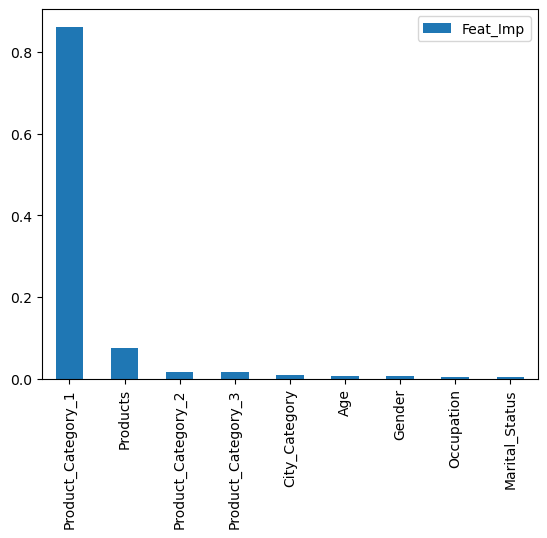

In [58]:
df3.sort_values(by = "Feat_Imp", ascending = False,kind = "quicksort").plot(kind = "bar")

### Ridge

In [65]:
ridge = Ridge()
ridge_model = ridge.fit(train_scaled,ytrain)
ridge_pred_train = ridge_model.predict(train_scaled)
ridge_pred_test = ridge_model.predict(test_scaled)
print('Train Score',ridge_model.score(train_scaled,ytrain))
print('Test Score',ridge_model.score(test_scaled,ytest))
print('Train RMSE',np.sqrt(mean_squared_error(ytrain,ridge_pred_train)))
print('Test RMSE',np.sqrt(mean_squared_error(ytest,ridge_pred_test)))

Train Score 0.13197725013214
Test Score 0.1337914183052834
Train RMSE 4675.077510201174
Test RMSE 4686.135247196048


### Lasso

In [66]:
lasso = Lasso()
lasso_model = lasso.fit(train_scaled,ytrain)
lasso_pred_train = lasso_model.predict(train_scaled)
lasso_pred_test = lasso_model.predict(test_scaled)
print('Train Score',lasso_model.score(train_scaled,ytrain))
print('Test Score',lasso_model.score(test_scaled,ytest))
print('Train RMSE',np.sqrt(mean_squared_error(ytrain,lasso_pred_train)))
print('Test RMSE',np.sqrt(mean_squared_error(ytest,lasso_pred_test)))

Train Score 0.13197391479773846
Test Score 0.13377727493894698
Train RMSE 4675.086492069376
Test RMSE 4686.173504411667


### Elastic Net

In [67]:
en = ElasticNet()
en_model = en.fit(train_scaled,ytrain)
en_pred_train = en_model.predict(train_scaled)
en_pred_test = en_model.predict(test_scaled)
print('Train Score',en_model.score(train_scaled,ytrain))
print('Test Score',en_model.score(test_scaled,ytest))
print('Train RMSE',np.sqrt(mean_squared_error(ytrain,en_pred_train)))
print('Test RMSE',np.sqrt(mean_squared_error(ytest,en_pred_test)))

Train Score 0.11378515525952515
Test Score 0.11459837920141758
Train RMSE 4723.813816109988
Test RMSE 4737.767385700252


### Cross Validation

#### Linear Regression (K -Fold : 10)

In [78]:
lr_cvs = cross_val_score(lr,x,y,cv = 10)
lr_cvs

array([0.11826254, 0.11523217, 0.11400294, 0.11002194, 0.11652383,
       0.10867022, 0.11814374, 0.10885741, 0.11222638, 0.25864489])

#### Decision Tree (K -Fold : 10)

In [79]:
dt_cvs = cross_val_score(dt,x,y,cv = 10)
dt_cvs

array([0.60010672, 0.60098721, 0.60137891, 0.60003651, 0.59833525,
       0.60684522, 0.60617705, 0.60047305, 0.60603961, 0.65583549])

#### Random Forest (K -Fold : 10)

In [80]:
rf_cvs = cross_val_score(rf,x,y,cv = 10)
rf_cvs

array([0.632221  , 0.63113583, 0.63244281, 0.63151268, 0.62988871,
       0.63851594, 0.63470511, 0.63162532, 0.63604844, 0.6804999 ])

#### Tunned XG Boost Regression  (K -Fold : 10)

In [59]:
xg_tunned_cvs = cross_val_score(xg_tunned,x,y,cv = 10)
xg_tunned_cvs

array([0.66355683, 0.66373791, 0.66382786, 0.66402577, 0.66261908,
       0.66696013, 0.66686624, 0.66308781, 0.66563383, 0.70500549])

#### XG Boost Regression (K -Fold : 10)

In [61]:
xg_cvs = cross_val_score(xg,x,y,cv = 10)
xg_cvs

array([0.66156734, 0.66143536, 0.66223425, 0.66197171, 0.66132532,
       0.66498498, 0.66434047, 0.66136221, 0.66293886, 0.70343806])

Linear Regression :  Bias Error = 0.8719413924379639,  Variance Error=0.04602264216141038
Decision Tree :  Bias Error = 0.3923784965514462,  Variance Error=0.017204981943097497
Random Forest :  Bias Error = 0.362140427280393,  Variance Error=0.015205578342370376
XGBoost Regression :  Bias Error = 0.33344014383409804,  Variance Error=0.01302085162632112
Tunned XGBoost Regression :  Bias Error = 0.33146790489053013,  Variance Error=0.012904491466710794


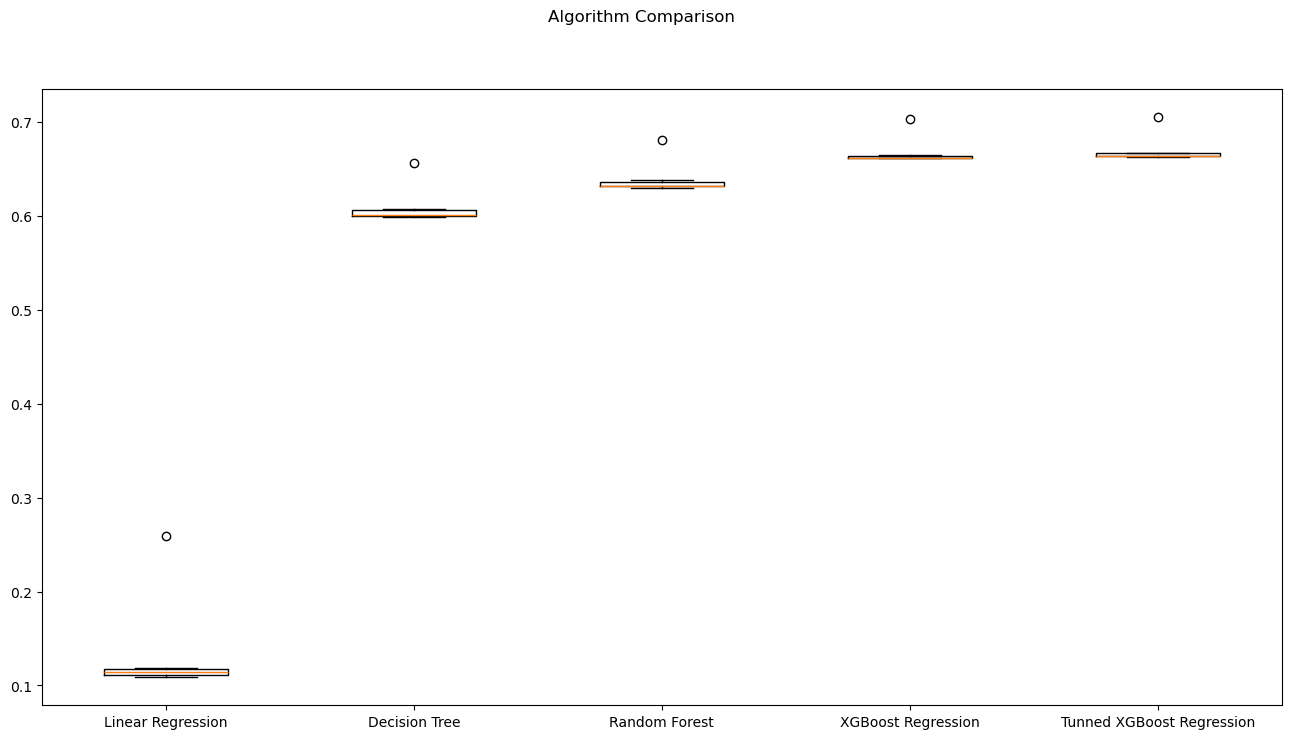

In [84]:
model = {'Linear Regression':lr_cvs,
         'Decision Tree':dt_cvs,
         'Random Forest':rf_cvs,
         'XGBoost Regression':xg_cvs,
         'Tunned XGBoost Regression':xg_tunned_cvs}
results = []
names = []
for name in model.keys():
    cv_results = np.array(model[name])
    results.append(cv_results)
    names.append(name)
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-cv_results),np.std(cv_results,ddof=1)))
fig = plt.figure(figsize=(16,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [77]:
# Tunned XGBoost Regression was the best model compared to other models
# It Has Better Accuracy and have less RMSE error value than the other models

In [ ]:
Improved inventory management and marketing strategies led to increased revenue and customer satisfaction.

# What makes a model Good?

**At this point we finished the project.but there is something importan i want to explain.
Do you always choose the model with the highest accuracy??**
> The answer is No 

**First of all it depends on the task you're solving**

**Let's say you have 2 models KNN with acc 90% and Random Forest with 85% acc. It seems obvious to choose the model with the highest accuracy but there are other parameters to consider like the Inference Time.**

**Inference Time : the time the model spends after it's trained on a dataset to make a prediction on an unseen sample**

**So let's say the inference time for KNN is 1 min and for the Random Forest is 1 sec. What model to choose?**

**So to pick a model it's important to know the use case you're working on.                                        Case 1 --> Predict if a college student is gonna drop out or not based on some observations**
> In that case time isn't important as accuracy so we'll choose KNN



Case 2 --> The probability if some user is gonna click on a result for a search engine
> In that case it doesn't make sense to take a minute that is too long time

So accuracy isn't the only parameter to consider to choose a good model